# Project2 - Investigate a Dataset
### by Lucas Aledi

<a id='table'></a>
## Table of Contents

* 1\. <a href="#intro">Introduction</a>
* 2\. <a href="#wrangling">Data Wrangling</a>
    * 2.1. <a href="#gathering">Gathering Data</a>
    * 2.2. <a href="#assessing">Assessing Data</a>
    * 2.3. <a href="#cleaning">Cleaning Data</a>
* 3\. <a href="#eda">Exploratory Data Analysis (EDA)</a>
* 4\. <a href="#conclusions">Conclusions</a>
* 5\. <a href="#references">References</a>

[back to top](#table)
<a id='intro'></a>
## Introduction
This is the second project of the Data Analyst Nanodegree on Udacity. This time, we have been asked to investigate a dataset of our choosing from a previously selected list. 

For this project, I have chosen to look into a [soccer database which can be found on Kaggle](https://www.kaggle.com/hugomathien/soccer) and is well suited for data analysis and machine learning.

Given the chosen dataset and the scope of this project, I will ponder over and seek to answer the following questions:
#### Questions to be asked:
    1) What is the number of teams in each league?

    2) What are the leagues with most goals scored? Which league is the one with most goals scored per match (ratio)?

    3) Is there a difference in the number of goals scored by a team in home and away matches? What are the top teams based on the number of goals scored per match (ratio)?

    4) Which team won the most matches (absolute)? Which team has most victories per match played (ratio)?
    
    5) Specifically to Spain LIGA BBVA, what features are more closely related to better/worse performance? For instance, is the number of away victories correlated with a better position in the end of the season? Similarly, is the overall performance of a team affected by the number of home losses?
        - For this, we will have to do some feature engineering by calculating for each team per season:
            * total number of matches: "matches_played"
            * total amount of point by the end of each season: "points"
            * difference between points scored compared to previous season: "diff"
            * number of victories: "victory"
            * number of draws: "draw"
            * number of losses: "defeat"
            * total number of goals scored: "goals_scored"
            * total number of goals suffered: "goals_conceded"
            * difference between "goals_scored" and "goals_conceded": "goals_difference"

    6) Which teams evolved the most in terms of points scored at the end of the season?
    
Important to mention here that, for organizational reasons, I will describe the dataset features on the <a href="#eda">EDA section</a> of this notebook.

That all being said, below are the packages I am going to use during the analysis.

In [480]:
# import all packages and set plots to be embedded inline
import os
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import seaborn as sb
import sqlite3
%matplotlib inline

[back to top](#table)
<a id='wrangling'></a>
## Data Wrangling
<a id='gathering'></a>
### Gathering Data
Let's start by downloading the relevant dataset. Kaggle makes it available [here](https://www.kaggle.com/hugomathien/soccer/download). It is stored in a SQLite database file which contains data for soccer matches, players, and teams from several European countries from 2008 to 2016.

In [481]:
# connecting to database and querying all data
with sqlite3.connect("database.sqlite") as con:
    countries= pd.read_sql_query("SELECT * FROM Country", con)
    matches= pd.read_sql_query("SELECT * FROM Match", con)
    leagues= pd.read_sql_query("SELECT * FROM League", con)
    teams= pd.read_sql_query("SELECT * FROM Team", con)
    player= pd.read_sql_query("SELECT * FROM Player", con)
    player_attributes= pd.read_sql_query("SELECT * FROM Player_Attributes", con)
    team_attributes= pd.read_sql_query("SELECT * FROM Team_Attributes", con)

[back to top](#table)
<a id='assessing'></a>
### Assessing Data
Having the data loaded, now let's assess its attributes and see how it is structured.

In [482]:
# overview of countries data shape and composition
print(countries)
countries.info()

       id         name
0       1      Belgium
1    1729      England
2    4769       France
3    7809      Germany
4   10257        Italy
5   13274  Netherlands
6   15722       Poland
7   17642     Portugal
8   19694     Scotland
9   21518        Spain
10  24558  Switzerland
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      11 non-null     int64 
 1   name    11 non-null     object
dtypes: int64(1), object(1)
memory usage: 304.0+ bytes


In [483]:
# overview of leagues data shape and composition
print(leagues)
leagues.info()

       id  country_id                      name
0       1           1    Belgium Jupiler League
1    1729        1729    England Premier League
2    4769        4769            France Ligue 1
3    7809        7809     Germany 1. Bundesliga
4   10257       10257             Italy Serie A
5   13274       13274    Netherlands Eredivisie
6   15722       15722        Poland Ekstraklasa
7   17642       17642  Portugal Liga ZON Sagres
8   19694       19694   Scotland Premier League
9   21518       21518           Spain LIGA BBVA
10  24558       24558  Switzerland Super League
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          11 non-null     int64 
 1   country_id  11 non-null     int64 
 2   name        11 non-null     object
dtypes: int64(2), object(1)
memory usage: 392.0+ bytes


In [484]:
# overview of matches data shape and composition
print(matches.info())
matches.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Columns: 115 entries, id to BSA
dtypes: float64(96), int64(9), object(10)
memory usage: 22.8+ MB
None


,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [485]:
# test for null values on matches
for col in matches.columns:
    print(col + " = " + str(sum(matches[col].isnull())))

id = 0
country_id = 0
league_id = 0
season = 0
stage = 0
date = 0
match_api_id = 0
home_team_api_id = 0
away_team_api_id = 0
home_team_goal = 0
away_team_goal = 0
home_player_X1 = 1821
home_player_X2 = 1821
home_player_X3 = 1832
home_player_X4 = 1832
home_player_X5 = 1832
home_player_X6 = 1832
home_player_X7 = 1832
home_player_X8 = 1832
home_player_X9 = 1832
home_player_X10 = 1832
home_player_X11 = 1832
away_player_X1 = 1832
away_player_X2 = 1832
away_player_X3 = 1832
away_player_X4 = 1832
away_player_X5 = 1832
away_player_X6 = 1832
away_player_X7 = 1832
away_player_X8 = 1832
away_player_X9 = 1833
away_player_X10 = 1833
away_player_X11 = 1839
home_player_Y1 = 1821
home_player_Y2 = 1821
home_player_Y3 = 1832
home_player_Y4 = 1832
home_player_Y5 = 1832
home_player_Y6 = 1832
home_player_Y7 = 1832
home_player_Y8 = 1832
home_player_Y9 = 1832
home_player_Y10 = 1832
home_player_Y11 = 1832
away_player_Y1 = 1832
away_player_Y2 = 1832
away_player_Y3 = 1832
away_player_Y4 = 1832
away_player_Y5 = 

In [486]:
# overview of teams data shape and composition
print(teams.info())
teams.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                299 non-null    int64  
 1   team_api_id       299 non-null    int64  
 2   team_fifa_api_id  288 non-null    float64
 3   team_long_name    299 non-null    object 
 4   team_short_name   299 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 11.8+ KB
None


,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


In [487]:
# overview of player data shape and composition
print(player.info())
player.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  11060 non-null  int64  
 1   player_api_id       11060 non-null  int64  
 2   player_name         11060 non-null  object 
 3   player_fifa_api_id  11060 non-null  int64  
 4   birthday            11060 non-null  object 
 5   height              11060 non-null  float64
 6   weight              11060 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 605.0+ KB
None


,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


In [488]:
# overview of player_attributes data shape and composition
print(player_attributes.info())
player_attributes.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   183978 non-null  int64  
 1   player_fifa_api_id   183978 non-null  int64  
 2   player_api_id        183978 non-null  int64  
 3   date                 183978 non-null  object 
 4   overall_rating       183142 non-null  float64
 5   potential            183142 non-null  float64
 6   preferred_foot       183142 non-null  object 
 7   attacking_work_rate  180748 non-null  object 
 8   defensive_work_rate  183142 non-null  object 
 9   crossing             183142 non-null  float64
 10  finishing            183142 non-null  float64
 11  heading_accuracy     183142 non-null  float64
 12  short_passing        183142 non-null  float64
 13  volleys              181265 non-null  float64
 14  dribbling            183142 non-null  float64
 15  curve            

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [489]:
# overview of team_attributes data shape and composition
print(team_attributes.info())
team_attributes.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              1458 non-null   int64  
 1   team_fifa_api_id                1458 non-null   int64  
 2   team_api_id                     1458 non-null   int64  
 3   date                            1458 non-null   object 
 4   buildUpPlaySpeed                1458 non-null   int64  
 5   buildUpPlaySpeedClass           1458 non-null   object 
 6   buildUpPlayDribbling            489 non-null    float64
 7   buildUpPlayDribblingClass       1458 non-null   object 
 8   buildUpPlayPassing              1458 non-null   int64  
 9   buildUpPlayPassingClass         1458 non-null   object 
 10  buildUpPlayPositioningClass     1458 non-null   object 
 11  chanceCreationPassing           1458 non-null   int64  
 12  chanceCreationPassingClass      14

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


Having taken a quick look at the data, I have identified the following issues which deserve some attention:

#### Tidiness issues
* 1\. Need to merge countries and leagues tables into one (*national_league*);
* 2\. Matches table contains multiple observational unit forms. For this analysis, I will be focusing on goals scored home and away;
* 3\. Need to merge matches into the same dataframe as countries and leagues
* 4\. On df, create new home_team and away_team columns based on teams_clean table

#### Quality issues
* 5\. date column is not datetime type and it includes hour, should only be yyyy-mm-dd format
* 6\. country, league and season columns should be categorical

#### Limitations of the dataset and upcoming analysis
After having assessed the available data, a couple of remarks must be made:
* 1\. There is some missing data (e.g. Belgium Jupiler league 2013/2014 season with only 4 teams) that would require further data gathering;
* 2\. This is a sample data set, therefore, a different sample could lead to different results (e.g., data from seasons prior to 2008 may show that a team's performance might have been related to different variables)

[back to top](#table)
<a id='cleaning'></a>
### Cleaning Data
Before getting started, we shall make copies of all dataframes.

In [490]:
# copying dataframes
countries_clean= countries.copy()
leagues_clean= leagues.copy()
matches_clean= matches.copy()
teams_clean= teams.copy()
player_clean= player.copy()
player_attributes_clean= player_attributes.copy()
team_attributes_clean= team_attributes.copy()

#### (Tidiness) Merge countries and leagues tables into national_league

In [491]:
# merge countries and leagues tables into national_league
national_league= countries_clean.merge(leagues_clean, left_on= "id",
                                       right_on= "id", how= "outer")

# drop country_id
national_league= national_league.drop('country_id', axis= 1)

# rename columns
national_league= national_league.rename(columns={'id':'country_id',
                                                 'name_x':'country',
                                                 'name_y':'league'})

In [492]:
# test
national_league

,country_id,country,league
0,1,Belgium,Belgium Jupiler League
1,1729,England,England Premier League
2,4769,France,France Ligue 1
3,7809,Germany,Germany 1. Bundesliga
4,10257,Italy,Italy Serie A
5,13274,Netherlands,Netherlands Eredivisie
6,15722,Poland,Poland Ekstraklasa
7,17642,Portugal,Portugal Liga ZON Sagres
8,19694,Scotland,Scotland Premier League
9,21518,Spain,Spain LIGA BBVA


#### (Tidiness) Matches table with multiple observational unit forms
Here, I will select from matches_clean table only the columns whih will be useful in this analysis.

In [493]:
# Subsetting data with relevant columns
relevant_columns= ['country_id', 'league_id', 'season', 'stage',
                   'date', 'match_api_id', 'home_team_api_id',
                   'away_team_api_id', 'home_team_goal', 'away_team_goal']
matches_clean= matches_clean[relevant_columns]

In [494]:
# test
print(matches_clean.info())
matches_clean.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   country_id        25979 non-null  int64 
 1   league_id         25979 non-null  int64 
 2   season            25979 non-null  object
 3   stage             25979 non-null  int64 
 4   date              25979 non-null  object
 5   match_api_id      25979 non-null  int64 
 6   home_team_api_id  25979 non-null  int64 
 7   away_team_api_id  25979 non-null  int64 
 8   home_team_goal    25979 non-null  int64 
 9   away_team_goal    25979 non-null  int64 
dtypes: int64(8), object(2)
memory usage: 2.0+ MB
None


,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1
1,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0
2,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3
3,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0
4,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3


#### (Tidiness) Merge national_league and matches_clean into one dataframe

In [495]:
# merge national_league data with matches_clean data
df= national_league.merge(matches_clean, left_on= "country_id",
                        right_on= "country_id", how= "outer")

In [496]:
# test
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25979 entries, 0 to 25978
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   country_id        25979 non-null  int64 
 1   country           25979 non-null  object
 2   league            25979 non-null  object
 3   league_id         25979 non-null  int64 
 4   season            25979 non-null  object
 5   stage             25979 non-null  int64 
 6   date              25979 non-null  object
 7   match_api_id      25979 non-null  int64 
 8   home_team_api_id  25979 non-null  int64 
 9   away_team_api_id  25979 non-null  int64 
 10  home_team_goal    25979 non-null  int64 
 11  away_team_goal    25979 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 2.6+ MB
None


,country_id,country,league,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,1,Belgium,Belgium Jupiler League,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1
1,1,Belgium,Belgium Jupiler League,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0
2,1,Belgium,Belgium Jupiler League,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3
3,1,Belgium,Belgium Jupiler League,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0
4,1,Belgium,Belgium Jupiler League,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3


#### (Tidiness) Create new home_team and away_team columns based on teams_clean table

In [497]:
# set "team_api_id" as index and create new columns using map on "team_long_name"
df["home_team"]= df["home_team_api_id"].map(teams_clean.set_index("team_api_id")["team_long_name"])
df["away_team"]= df["away_team_api_id"].map(teams_clean.set_index("team_api_id")["team_long_name"])

In [498]:
# test
df.sample(n=10, random_state=2020)

,country_id,country,league,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_team,away_team
9216,7809,Germany,Germany 1. Bundesliga,7809,2012/2013,28,2013-04-06 00:00:00,1239715,9790,8358,0,1,Hamburger SV,SC Freiburg
15653,13274,Netherlands,Netherlands Eredivisie,13274,2015/2016,33,2016-05-01 00:00:00,1983564,8640,7788,6,2,PSV,SC Cambuur
13487,13274,Netherlands,Netherlands Eredivisie,13274,2008/2009,30,2009-04-12 00:00:00,523918,10235,9791,5,1,Feyenoord,Heracles Almelo
5050,4769,France,France Ligue 1,4769,2008/2009,35,2009-05-13 00:00:00,483502,8682,9847,0,1,Le Mans FC,Paris Saint-Germain
15126,13274,Netherlands,Netherlands Eredivisie,13274,2014/2015,10,2014-10-26 00:00:00,1712483,6413,10228,2,2,PEC Zwolle,SC Heerenveen
22878,21518,Spain,Spain LIGA BBVA,21518,2011/2012,3,2011-09-11 00:00:00,1051670,8371,9869,2,1,CA Osasuna,Real Sporting de Gijón
21580,21518,Spain,Spain LIGA BBVA,21518,2008/2009,15,2008-12-14 00:00:00,530346,9865,8696,1,1,UD Almería,Racing Santander
14453,13274,Netherlands,Netherlands Eredivisie,13274,2011/2012,5,2011-09-10 00:00:00,1028522,8526,8464,1,0,De Graafschap,N.E.C.
11093,10257,Italy,Italy Serie A,10257,2010/2011,16,2010-12-11 00:00:00,888317,10233,9875,0,1,Genoa,Napoli
12622,10257,Italy,Italy Serie A,10257,2014/2015,19,2015-01-18 00:00:00,1786161,10167,9882,0,2,Parma,Sampdoria


In [499]:
# reordering columns
cols= ["country", "country_id", "league", "league_id", "season", "stage",
       "date", "match_api_id", "home_team", "home_team_api_id", "home_team_goal",
       "away_team", "away_team_api_id", "away_team_goal"]
df= df[cols]

In [500]:
# test
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25979 entries, 0 to 25978
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   country           25979 non-null  object
 1   country_id        25979 non-null  int64 
 2   league            25979 non-null  object
 3   league_id         25979 non-null  int64 
 4   season            25979 non-null  object
 5   stage             25979 non-null  int64 
 6   date              25979 non-null  object
 7   match_api_id      25979 non-null  int64 
 8   home_team         25979 non-null  object
 9   home_team_api_id  25979 non-null  int64 
 10  home_team_goal    25979 non-null  int64 
 11  away_team         25979 non-null  object
 12  away_team_api_id  25979 non-null  int64 
 13  away_team_goal    25979 non-null  int64 
dtypes: int64(8), object(6)
memory usage: 3.0+ MB
None


,country,country_id,league,league_id,season,stage,date,match_api_id,home_team,home_team_api_id,home_team_goal,away_team,away_team_api_id,away_team_goal
0,Belgium,1,Belgium Jupiler League,1,2008/2009,1,2008-08-17 00:00:00,492473,KRC Genk,9987,1,Beerschot AC,9993,1
1,Belgium,1,Belgium Jupiler League,1,2008/2009,1,2008-08-16 00:00:00,492474,SV Zulte-Waregem,10000,0,Sporting Lokeren,9994,0
2,Belgium,1,Belgium Jupiler League,1,2008/2009,1,2008-08-16 00:00:00,492475,KSV Cercle Brugge,9984,0,RSC Anderlecht,8635,3
3,Belgium,1,Belgium Jupiler League,1,2008/2009,1,2008-08-17 00:00:00,492476,KAA Gent,9991,5,RAEC Mons,9998,0
4,Belgium,1,Belgium Jupiler League,1,2008/2009,1,2008-08-16 00:00:00,492477,FCV Dender EH,7947,1,Standard de Liège,9985,3


#### (Quality) date column is not datetime type and it includes hour, should only be yyyy-mm-dd format

In [501]:
# using to_datetime to convert values
df.date= pd.to_datetime(df.date)

In [502]:
# test
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25979 entries, 0 to 25978
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   country           25979 non-null  object        
 1   country_id        25979 non-null  int64         
 2   league            25979 non-null  object        
 3   league_id         25979 non-null  int64         
 4   season            25979 non-null  object        
 5   stage             25979 non-null  int64         
 6   date              25979 non-null  datetime64[ns]
 7   match_api_id      25979 non-null  int64         
 8   home_team         25979 non-null  object        
 9   home_team_api_id  25979 non-null  int64         
 10  home_team_goal    25979 non-null  int64         
 11  away_team         25979 non-null  object        
 12  away_team_api_id  25979 non-null  int64         
 13  away_team_goal    25979 non-null  int64         
dtypes: datetime64[ns](1), 

#### (Quality) country, league and season columns should be categorical

In [503]:
# Changing country to categorical dtype
countries= list(df.country.unique())
categorical= pd.api.types.CategoricalDtype(ordered= False, categories= countries)
df['country']= df['country'].astype(categorical)

In [504]:
# Changing league to categorical dtype
leagues= list(df.league.unique())
categorical= pd.api.types.CategoricalDtype(ordered= False, categories= leagues)
df['league']= df['league'].astype(categorical)

In [505]:
# Changing season to categorical dtype
seasons= list(df.season.unique())
categorical= pd.api.types.CategoricalDtype(ordered= True, categories= seasons)
df['season']= df['season'].astype(categorical)

In [506]:
# test
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25979 entries, 0 to 25978
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   country           25979 non-null  category      
 1   country_id        25979 non-null  int64         
 2   league            25979 non-null  category      
 3   league_id         25979 non-null  int64         
 4   season            25979 non-null  category      
 5   stage             25979 non-null  int64         
 6   date              25979 non-null  datetime64[ns]
 7   match_api_id      25979 non-null  int64         
 8   home_team         25979 non-null  object        
 9   home_team_api_id  25979 non-null  int64         
 10  home_team_goal    25979 non-null  int64         
 11  away_team         25979 non-null  object        
 12  away_team_api_id  25979 non-null  int64         
 13  away_team_goal    25979 non-null  int64         
dtypes: category(3), dateti

[back to top](#table)
<a id='eda'></a>
## Exploratory Data Analysis

The original dataset contains information on +25,000 matches, +10,000 players, 11 European Countries with their lead championship
Seasons 2008 to 2016, players and teams' attributes sourced from EA Sports' FIFA video game series, including the weekly updates, team line up with squad formation (X, Y coordinates), betting odds from up to 10 providers, detailed match events (goal types, possession, corner, cross, fouls, cards etc…) for +10,000 matches.

Now, enough talking and let's dive deep into the proposed questions!

#### 1) What is the number of teams in each league per season?

In [507]:
# grouping df by league and season as to get number of unique teams
number_of_teams= (pd.DataFrame(df.groupby(["league", "season"])["home_team"]
                               .nunique()
                               .reset_index()))

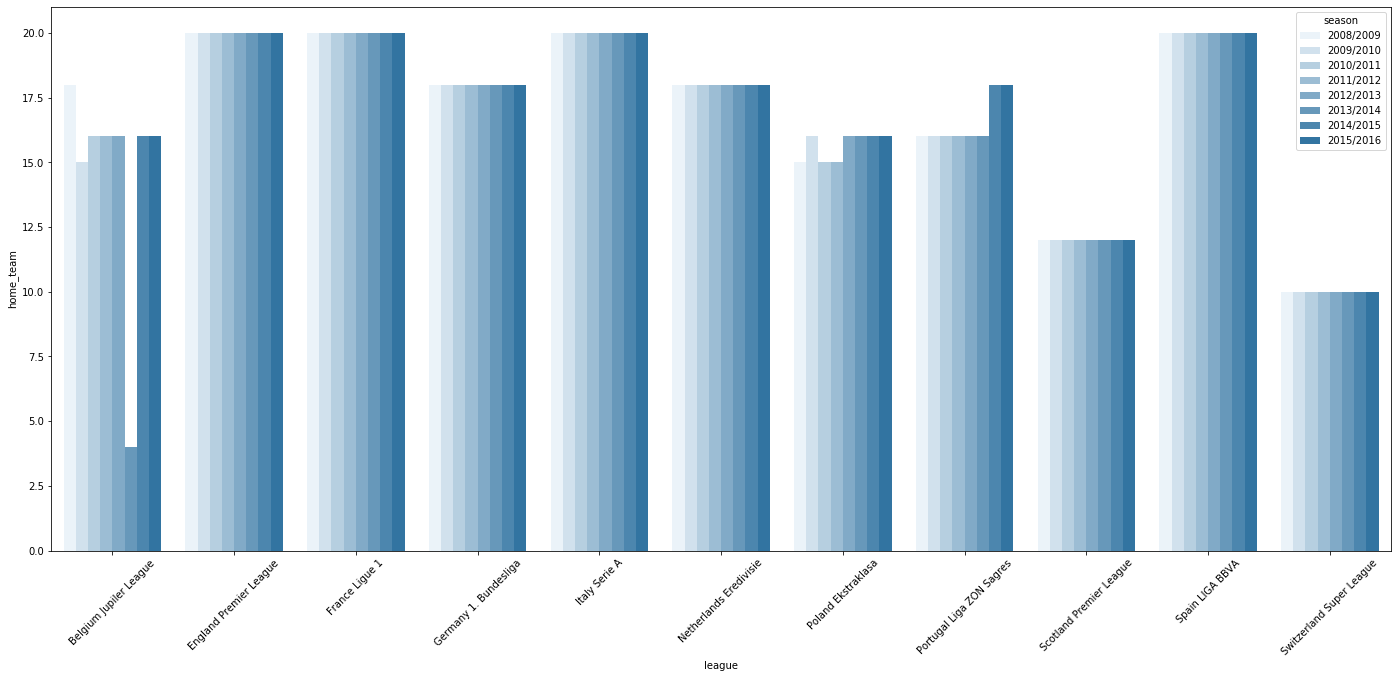

In [508]:
# plotting number of teams in each league per season
plt.figure(figsize= [24,10])
base_color = sb.color_palette()[0]
sb.barplot(data= number_of_teams, y='home_team', x= 'league',
              hue= "season", 
              color=base_color)
plt.xticks(rotation=45);

From the graph above, one can say that, except for the Scotland Premier League and the Switzerland Super League (which have had 12 and 10 teams, respectively), the majority of leagues range from 16 to 20 teams per season.

#### 2) What are the leagues with most goals scored? Which league is the one with most goals scored per match (ratio)?

In [509]:
# selecting relevant data
totals= df[["league", "match_api_id", "home_team_goal", "away_team_goal"]].groupby("league")

# aggregate the sum of home and away goals
totals= totals.agg({"match_api_id":"count", "home_team_goal": "sum", "away_team_goal": "sum"}).reset_index()

# create new column with total number of goals per league
totals["total_goals"]= totals["home_team_goal"] + totals["away_team_goal"]

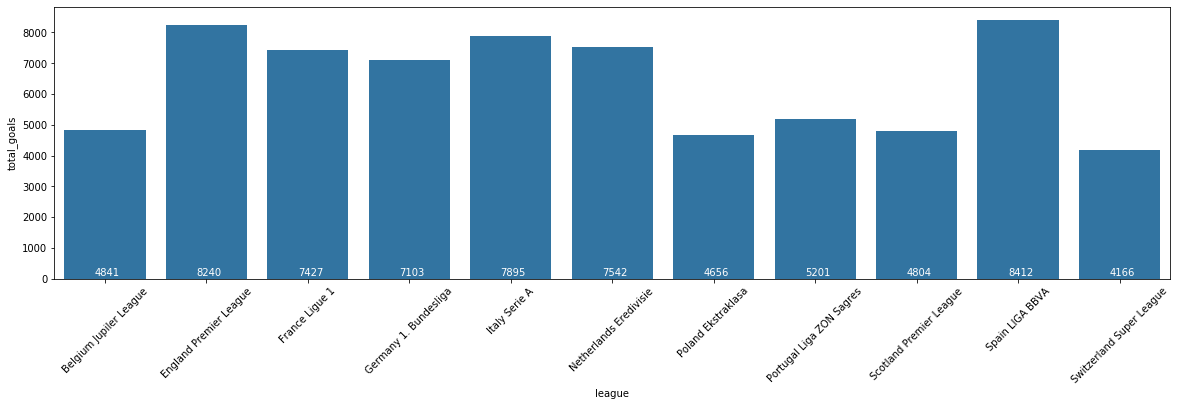

In [510]:
# absolute goals scored in each league
plt.figure(figsize=[20, 5])
base_color = sb.color_palette()[0]
sb.barplot(data= totals, y= 'total_goals', x= 'league', color=base_color)
plt.xticks(rotation=45);

#add text to bars
for i in range(totals.shape[0]):
    count = totals["total_goals"][i]
    string = '{}'.format(count) #3rd arg str to print
    plt.text(i-0.1, 200, string, va='center', color='w') #1st arg is x-pos | 2nd arg is y-pos & increases with loop  

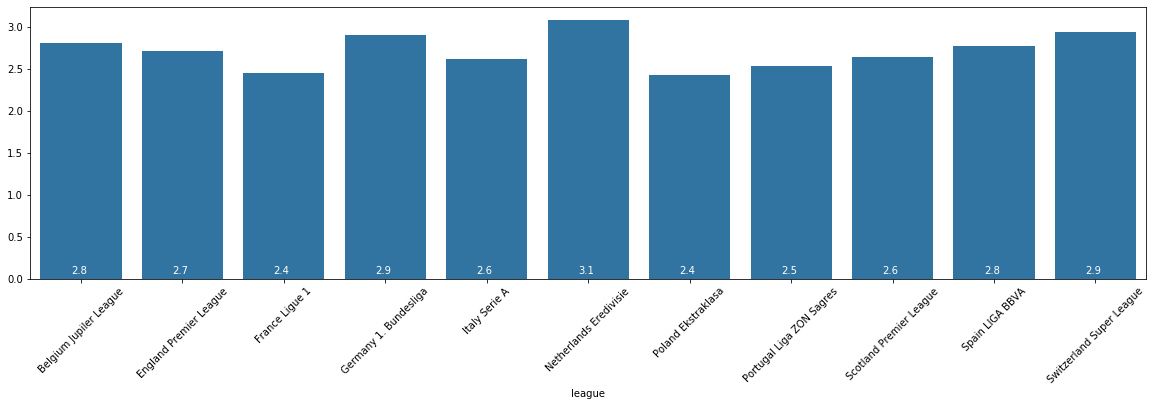

In [511]:
# ratio of goals scored per match
plt.figure(figsize=[20, 5])
base_color = sb.color_palette()[0]
sb.barplot(data= totals, y= totals['total_goals']/totals['match_api_id'], x= 'league', color=base_color)
plt.xticks(rotation=45);

#for loop to add text elements
for i in range(totals.shape[0]):
    count = totals["total_goals"][i]/totals["match_api_id"][i]
    string = '{:0.1f}'.format(count) #3rd arg str to print
    plt.text(i-0.1, 0.1, string, va='center', color='w') #1st arg is x-pos | 2nd arg is y-pos & increases with loop  

Although Spain Liga BBVA is the one with the most goals scored (8412 goals over 8 seasons), the Netherlands Eredivisie takes the lead on the average number of goals scored per match (3.1).

#### 3) Is there a difference in the number of goals scored by a team in home and away matches? What are the top teams based on the number of goals scored per match (ratio)?

In [512]:
# create new columns
totals["home_goals_ratio"]= totals["home_team_goal"]/totals["match_api_id"]
totals["away_goals_ratio"]= totals["away_team_goal"]/totals["match_api_id"]

# set_index
totals= totals.set_index("league")

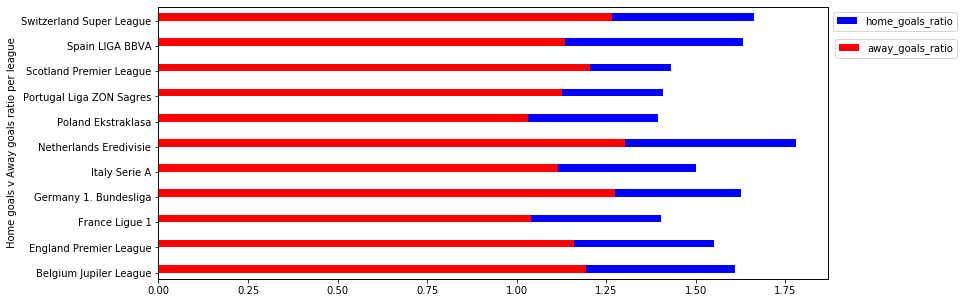

In [513]:
# Plotting home goals v away goals
fig = plt.figure(figsize=(12,5))

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as a
width = .3

totals.home_goals_ratio.plot(kind='barh',color='blue',ax=ax,width=width, position=0)
totals.away_goals_ratio.plot(kind='barh',color='red', ax=ax2,width =width, position=1)

ax.set_ylabel('Home goals v Away goals ratio per league')
ax2.set_ylabel("")
ax2.set_yticks([])

ax.legend(loc='best', bbox_to_anchor=(1, 1))
ax2.legend(loc='best', bbox_to_anchor=(1.2, .9))
plt.show()

As one can see from the graph above, teams playing at home tend to, on average, score more goals than those playing away.

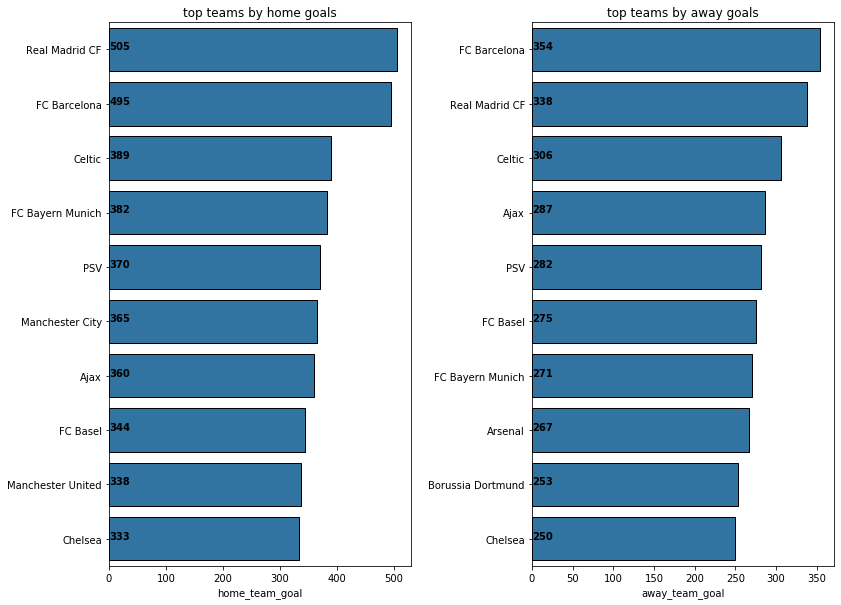

In [514]:
# sorting home_team by goals scored
h_t = df.groupby("home_team")["home_team_goal"].sum().reset_index()
h_t = h_t.sort_values(by="home_team_goal",ascending= False)

# sorting away_team by goals scored
a_t = df.groupby("away_team")["away_team_goal"].sum().reset_index()
a_t = a_t.sort_values(by="away_team_goal",ascending= False)

# plot for home_team
plt.figure(figsize=(13,10))
plt.subplot(1,2,1)
base_color = sb.color_palette()[0]
ax = sb.barplot(y="home_team",x="home_team_goal",
                 data=h_t[:10], color= base_color,
                 linewidth = 1,edgecolor = "k"*20)
plt.ylabel('')
plt.title("top teams by home goals")

# adding total goals scored to bottom of bar
for i,j in enumerate(h_t["home_team_goal"][:10]):
    ax.text(.7,i,j,weight = "bold")

# plot for away_team
plt.subplot(1,2,2)
ax = sb.barplot(y="away_team",x="away_team_goal",
                 data=a_t[:10], color= base_color,
                linewidth = 1,edgecolor = "k"*20)
plt.ylabel("")
plt.subplots_adjust(wspace = .4)
plt.title("top teams by away goals")

# adding total goals scored to bottom of bar
for i,j in enumerate(a_t["away_team_goal"][:10]):
    ax.text(.7,i,j,weight = "bold")

As one can see from the graph above, Real Madrid CF and FC Barcelona cap the top teams in terms of goals scored home and away, respectively.

#### 5) Specifically to Spain LIGA BBVA, what features are more closely related to higher/lower points scored? For instance, how does the number of home defeats and away victories correlated with the final points scored?
As mentioned before, for this part, we will have to do some feature engineering by calculating for each team per season:
   * total number of matches: "matches_played"
   * total amount of point by the end of each season: "points"
   * difference between points scored compared to previous season: "diff"
   * number of victories: "victory"
   * number of draws: "draw"
   * number of losses: "defeat"
   * total number of goals scored: "goals_scored"
   * total number of goals suffered: "goals_conceded"
   * difference between "goals_scored" and "goals_conceded": "goals_difference"
            
So, let's get to it.

In [515]:
# selecting Spain LIGA BBVA and relevant columns
liga= df.query("league == 'Spain LIGA BBVA'")[["season", "match_api_id", "home_team", "home_team_goal", "away_team", "away_team_goal"]]

# rename columns for simplicity's sake
liga= liga.rename(columns={"match_api_id":"matches_played", "home_team_goal":"home_goals", "away_team_goal":"away_goals"})

In [516]:
# test
liga.head()

,season,matches_played,home_team,home_goals,away_team,away_goals
21517,2008/2009,530023,Valencia CF,3,RCD Mallorca,0
21518,2008/2009,530084,CA Osasuna,1,Villarreal CF,1
21519,2008/2009,530085,RC Deportivo de La Coruña,2,Real Madrid CF,1
21520,2008/2009,530086,CD Numancia,1,FC Barcelona,0
21521,2008/2009,530087,Racing Santander,1,Sevilla FC,1


First, based on the information available for each match on *liga* dataframe, we have to deduce and create columns containing the necessary information for this part of the analysis. That is: *points for each team, count of victory, defeat or draw*.

In [517]:
# create empty columns for features to be engineered
liga["home_points"]= pd.Series(dtype='float')
liga["away_points"]= pd.Series(dtype='float')
liga["home_victory"]= pd.Series(dtype='float')
liga["home_defeat"]= pd.Series(dtype='float')
liga["away_victory"]= pd.Series(dtype='float')
liga["away_defeat"]= pd.Series(dtype='float')
liga["home_draw"]= pd.Series(dtype='float')
liga["away_draw"]= pd.Series(dtype='float')

# conditions for attributing values for new columns
for i in range(liga.shape[0]):

# home_team victory
    if liga["home_goals"].values[i] - liga["away_goals"].values[i] > 0:
        liga["home_points"].values[i] = int(3)
        liga["away_points"].values[i] = int(0)
        liga["home_victory"].values[i]= int(1)
        liga["home_defeat"].values[i]= int(0)
        liga["away_victory"].values[i]= int(0)
        liga["away_defeat"].values[i]= int(1)
        liga["home_draw"].values[i]= int(0)
        liga["away_draw"].values[i]= int(0)
# away_team victory
    elif liga["home_goals"].values[i] - liga["away_goals"].values[i] < 0:
        liga["home_points"].values[i] = int(0)
        liga["away_points"].values[i] = int(3)
        liga["home_victory"].values[i]= int(0)
        liga["home_defeat"].values[i]= int(1)
        liga["away_victory"].values[i]= int(1)
        liga["away_defeat"].values[i]= int(0)
        liga["home_draw"].values[i]= int(0)
        liga["away_draw"].values[i]= int(0)
# draw
    else:
        liga["home_points"].values[i] = int(1)
        liga["away_points"].values[i] = int(1)
        liga["home_victory"].values[i]= int(0)
        liga["home_defeat"].values[i]= int(0)
        liga["away_victory"].values[i]= int(0)
        liga["away_defeat"].values[i]= int(0)
        liga["home_draw"].values[i]= int(1)
        liga["away_draw"].values[i]= int(1)

In [518]:
# test
liga.head()

,season,matches_played,home_team,home_goals,away_team,away_goals,home_points,away_points,home_victory,home_defeat,away_victory,away_defeat,home_draw,away_draw
21517,2008/2009,530023,Valencia CF,3,RCD Mallorca,0,3.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
21518,2008/2009,530084,CA Osasuna,1,Villarreal CF,1,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
21519,2008/2009,530085,RC Deportivo de La Coruña,2,Real Madrid CF,1,3.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
21520,2008/2009,530086,CD Numancia,1,FC Barcelona,0,3.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
21521,2008/2009,530087,Racing Santander,1,Sevilla FC,1,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0


Now, with this new information, we can start designing the new columns: *matches_played, points, diff, victory, draw, defeat, goals_scored, goals_conceded, goals_difference*.

In [519]:
# matches_played
matches_played= liga.groupby(["season", "home_team"])["matches_played"].count().reset_index()

# drop rows with value 0
matches_played= matches_played.drop(matches_played[matches_played["matches_played"] == 0].index)

# rename column for simplicity's sake when merging all together
matches_played= matches_played.rename(columns={"home_team":"team"})

# for each home_team matches_played value a correspondent away_team matches_played value exists
# that's why we multiply by 2
matches_played["matches_played"]= matches_played["matches_played"]*2

In [520]:
# test
matches_played.head()

,season,team,matches_played
0,2008/2009,Athletic Club de Bilbao,38
1,2008/2009,Atlético Madrid,38
2,2008/2009,CA Osasuna,38
3,2008/2009,CD Numancia,38
7,2008/2009,FC Barcelona,38


In [521]:
# points
# first, home_points
home_points= liga.groupby(["season", "home_team"])["home_points"].sum().reset_index()

# drop nan values
home_points= home_points.dropna()

# rename column for simplicity's sake when merging all together
home_points= home_points.rename(columns={"home_team":"team"})

In [522]:
# test
home_points.head()

,season,team,home_points
0,2008/2009,Athletic Club de Bilbao,29.0
1,2008/2009,Atlético Madrid,40.0
2,2008/2009,CA Osasuna,29.0
3,2008/2009,CD Numancia,30.0
7,2008/2009,FC Barcelona,45.0


In [523]:
# points
# secondly, away_points
away_points= liga.groupby(["season", "away_team"])["away_points"].sum().reset_index()

# drop nan values
away_points= away_points.dropna()

# rename column for simplicity's sake when merging all together
away_points= away_points.rename(columns={"away_team":"team"})

In [524]:
# test
away_points.head()

,season,team,away_points
0,2008/2009,Athletic Club de Bilbao,15.0
1,2008/2009,Atlético Madrid,27.0
2,2008/2009,CA Osasuna,14.0
3,2008/2009,CD Numancia,5.0
7,2008/2009,FC Barcelona,42.0


In [525]:
# points
# create new points column by merging home_points and away_points
points= home_points.merge(away_points, left_on= ["season", "team"], right_on= ["season", "team"], how= "outer")

# add points all together
points["points"]= points.home_points + points.away_points

# drop irrelevant columns
points= points.drop(["home_points", "away_points"], axis=1)

In [526]:
# test
points.head()

,season,team,points
0,2008/2009,Athletic Club de Bilbao,44.0
1,2008/2009,Atlético Madrid,67.0
2,2008/2009,CA Osasuna,43.0
3,2008/2009,CD Numancia,35.0
4,2008/2009,FC Barcelona,87.0


At this point, we are ready to start creating the dataframe that will be used for this part of the analysis: *liga_clean*. It will contain all engineered features.

In [527]:
# create liga_clean by merging matches_played and points
liga_clean= matches_played.merge(points, left_on= ["season", "team"], right_on= ["season", "team"], how= "outer")

In [528]:
# test
liga_clean.head()

,season,team,matches_played,points
0,2008/2009,Athletic Club de Bilbao,38,44.0
1,2008/2009,Atlético Madrid,38,67.0
2,2008/2009,CA Osasuna,38,43.0
3,2008/2009,CD Numancia,38,35.0
4,2008/2009,FC Barcelona,38,87.0


Now, we should add a column which will track the improvement in performance for each team in comparison to the previous season.

In [529]:
# Tracking the difference in performance (points) per season
liga_clean["diff"]= liga_clean.groupby(by=["team"])["points"].diff()

In [530]:
# test
liga_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160 entries, 0 to 159
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   season          160 non-null    category
 1   team            160 non-null    object  
 2   matches_played  160 non-null    int64   
 3   points          160 non-null    float64 
 4   diff            127 non-null    float64 
dtypes: category(1), float64(2), int64(1), object(1)
memory usage: 6.8+ KB


In [531]:
# victory
# counting home victories
home_victory= liga.groupby(["season", "home_team"])["home_victory"].sum().reset_index().dropna()

# rename column for simplicity's sake when merging all together
home_victory= home_victory.rename(columns={"home_team":"team"})

# counting away victories
away_victory= liga.groupby(["season", "away_team"])["away_victory"].sum().reset_index().dropna()

# rename column for simplicity's sake when merging all together
away_victory= away_victory.rename(columns={"away_team":"team"})

# create total_victory dataframe containing total number of victories
total_victory= home_victory.merge(away_victory, right_on= ["season", "team"],left_on=["season", "team"], how= "outer")
total_victory["victory"]= total_victory["home_victory"] + total_victory["away_victory"]

# reorganizing columns for consistancy
total_victory= total_victory[["season", "team", "victory", "home_victory", "away_victory"]]

In [532]:
# test
total_victory.head()

,season,team,victory,home_victory,away_victory
0,2008/2009,Athletic Club de Bilbao,12.0,9.0,3.0
1,2008/2009,Atlético Madrid,20.0,13.0,7.0
2,2008/2009,CA Osasuna,10.0,8.0,2.0
3,2008/2009,CD Numancia,10.0,9.0,1.0
4,2008/2009,FC Barcelona,27.0,14.0,13.0


In [533]:
# defeat
# counting home losses
home_defeat= liga.groupby(["season", "home_team"])["home_defeat"].sum().reset_index().dropna()

# rename column for simplicity's sake when merging all together
home_defeat= home_defeat.rename(columns={"home_team":"team"})

# counting away losses
away_defeat= liga.groupby(["season", "away_team"])["away_defeat"].sum().reset_index().dropna()

# rename column for simplicity's sake when merging all together
away_defeat= away_defeat.rename(columns={"away_team":"team"})

# create lost dataframe containing total number of losses
total_defeat= home_defeat.merge(away_defeat, right_on= ["season", "team"],left_on=["season", "team"], how= "outer")
total_defeat["defeat"]= total_defeat["home_defeat"] + total_defeat["away_defeat"]

# reorganizing columns for consistancy
total_defeat= total_defeat[["season", "team", "defeat", "home_defeat", "away_defeat"]]

In [534]:
# test
total_defeat.head()

,season,team,defeat,home_defeat,away_defeat
0,2008/2009,Athletic Club de Bilbao,18.0,8.0,10.0
1,2008/2009,Atlético Madrid,11.0,5.0,6.0
2,2008/2009,CA Osasuna,15.0,6.0,9.0
3,2008/2009,CD Numancia,23.0,7.0,16.0
4,2008/2009,FC Barcelona,5.0,2.0,3.0


In [535]:
# draw
# counting home draws
home_draw= liga.groupby(["season", "home_team"])["home_draw"].sum().reset_index().dropna()

# rename column for simplicity's sake when merging all together
home_draw= home_draw.rename(columns={"home_team":"team"})

# counting away draws
away_draw= liga.groupby(["season", "away_team"])["away_draw"].sum().reset_index().dropna()

# rename column for simplicity's sake when merging all together
away_draw= away_draw.rename(columns={"away_team":"team"})

# create draw dataframe containing total number of draws
total_draw= home_draw.merge(away_draw, right_on= ["season", "team"],left_on=["season", "team"], how= "outer")
total_draw["draw"]= total_draw["home_draw"] + total_draw["away_draw"]

# reorganizing columns for consistancy
total_draw= total_draw[["season", "team", "draw", "home_draw", "away_draw"]]

In [536]:
# test
total_draw.head()

,season,team,draw,home_draw,away_draw
0,2008/2009,Athletic Club de Bilbao,8.0,2.0,6.0
1,2008/2009,Atlético Madrid,7.0,1.0,6.0
2,2008/2009,CA Osasuna,13.0,5.0,8.0
3,2008/2009,CD Numancia,5.0,3.0,2.0
4,2008/2009,FC Barcelona,6.0,3.0,3.0


In [537]:
# merge victory, defeat and draw into results dataframe
results= total_victory.merge((total_defeat.merge(total_draw, right_on= ["season", "team"],left_on=["season", "team"], how= "outer")),
                   right_on= ["season", "team"],left_on=["season", "team"], how= "outer")

In [538]:
# test
results.head()

,season,team,victory,home_victory,away_victory,defeat,home_defeat,away_defeat,draw,home_draw,away_draw
0,2008/2009,Athletic Club de Bilbao,12.0,9.0,3.0,18.0,8.0,10.0,8.0,2.0,6.0
1,2008/2009,Atlético Madrid,20.0,13.0,7.0,11.0,5.0,6.0,7.0,1.0,6.0
2,2008/2009,CA Osasuna,10.0,8.0,2.0,15.0,6.0,9.0,13.0,5.0,8.0
3,2008/2009,CD Numancia,10.0,9.0,1.0,23.0,7.0,16.0,5.0,3.0,2.0
4,2008/2009,FC Barcelona,27.0,14.0,13.0,5.0,2.0,3.0,6.0,3.0,3.0


In [539]:
# merge results into liga_clean
liga_clean= liga_clean.merge(results, right_on= ["season", "team"],left_on=["season", "team"], how= "outer")

In [540]:
# test
liga_clean.head()

,season,team,matches_played,points,diff,victory,home_victory,away_victory,defeat,home_defeat,away_defeat,draw,home_draw,away_draw
0,2008/2009,Athletic Club de Bilbao,38,44.0,NaN,12.0,9.0,3.0,18.0,8.0,10.0,8.0,2.0,6.0
1,2008/2009,Atlético Madrid,38,67.0,NaN,20.0,13.0,7.0,11.0,5.0,6.0,7.0,1.0,6.0
2,2008/2009,CA Osasuna,38,43.0,NaN,10.0,8.0,2.0,15.0,6.0,9.0,13.0,5.0,8.0
3,2008/2009,CD Numancia,38,35.0,NaN,10.0,9.0,1.0,23.0,7.0,16.0,5.0,3.0,2.0
4,2008/2009,FC Barcelona,38,87.0,NaN,27.0,14.0,13.0,5.0,2.0,3.0,6.0,3.0,3.0


In [541]:
# goals_scored
# first, count goals scored at home
home_goals= liga.groupby(["season", "home_team"])["home_goals"].sum().reset_index().dropna()

# secondly, count goals scored at away
away_goals= liga.groupby(["season", "away_team"])["away_goals"].sum().reset_index().dropna()

# rename column for simplicity's sake when merging all together
home_goals= home_goals.rename(columns={"home_team":"team"})
away_goals= away_goals.rename(columns={"away_team":"team"})

In [542]:
# create goals dataframe containing number of goals scored
goals= home_goals.merge(away_goals, right_on= ["season", "team"],left_on=["season", "team"], how= "outer")
goals['goals_scored']= goals["home_goals"] + goals["away_goals"]

# reorganizing columns for consistancy
goals= goals[["season", "team", "goals_scored", "home_goals", "away_goals"]]

In [543]:
# test
goals.head()

,season,team,goals_scored,home_goals,away_goals
0,2008/2009,Athletic Club de Bilbao,47.0,28.0,19.0
1,2008/2009,Atlético Madrid,80.0,47.0,33.0
2,2008/2009,CA Osasuna,41.0,27.0,14.0
3,2008/2009,CD Numancia,38.0,23.0,15.0
4,2008/2009,FC Barcelona,105.0,61.0,44.0


In [544]:
# merge goals into liga_clean
liga_clean= liga_clean.merge(goals, right_on= ["season", "team"],left_on=["season", "team"], how= "outer")

In [545]:
# test
liga_clean.head()

,season,team,matches_played,points,diff,victory,home_victory,away_victory,defeat,home_defeat,away_defeat,draw,home_draw,away_draw,goals_scored,home_goals,away_goals
0,2008/2009,Athletic Club de Bilbao,38,44.0,NaN,12.0,9.0,3.0,18.0,8.0,10.0,8.0,2.0,6.0,47.0,28.0,19.0
1,2008/2009,Atlético Madrid,38,67.0,NaN,20.0,13.0,7.0,11.0,5.0,6.0,7.0,1.0,6.0,80.0,47.0,33.0
2,2008/2009,CA Osasuna,38,43.0,NaN,10.0,8.0,2.0,15.0,6.0,9.0,13.0,5.0,8.0,41.0,27.0,14.0
3,2008/2009,CD Numancia,38,35.0,NaN,10.0,9.0,1.0,23.0,7.0,16.0,5.0,3.0,2.0,38.0,23.0,15.0
4,2008/2009,FC Barcelona,38,87.0,NaN,27.0,14.0,13.0,5.0,2.0,3.0,6.0,3.0,3.0,105.0,61.0,44.0


In [546]:
# goals_conceded
# first, count goals suffered at home
home_goals_suffered= liga.groupby(["season", "home_team"])["away_goals"].sum().reset_index().dropna()

# secondly, count goals suffered at away
away_goals_suffered= liga.groupby(["season", "away_team"])["home_goals"].sum().reset_index().dropna()

# rename column for simplicity's sake when merging all together
home_goals_suffered= home_goals_suffered.rename(columns={"home_team":"team", "away_goals":"home_goals_suffered"})
away_goals_suffered= away_goals_suffered.rename(columns={"away_team":"team", "home_goals":"away_goals_suffered"})

In [547]:
# create goals_conceded dataframe containing number of goals suffered
goals_conceded= home_goals_suffered.merge(away_goals_suffered, right_on= ["season", "team"],left_on=["season", "team"], how= "outer")
goals_conceded['goals_conceded']= goals_conceded["home_goals_suffered"] + goals_conceded["away_goals_suffered"]

# reorganizing columns for consistancy
goals_conceded= goals_conceded[["season", "team", "goals_conceded", "home_goals_suffered", "away_goals_suffered"]]

In [548]:
# test
goals_conceded.head()

,season,team,goals_conceded,home_goals_suffered,away_goals_suffered
0,2008/2009,Athletic Club de Bilbao,62.0,29.0,33.0
1,2008/2009,Atlético Madrid,57.0,23.0,34.0
2,2008/2009,CA Osasuna,47.0,22.0,25.0
3,2008/2009,CD Numancia,69.0,22.0,47.0
4,2008/2009,FC Barcelona,35.0,14.0,21.0


In [549]:
# merge goals_conceded into liga_clean
liga_clean= liga_clean.merge(goals_conceded, right_on= ["season", "team"],left_on=["season", "team"], how= "outer")

In [550]:
# create goals_difference column
liga_clean["goals_difference"]= liga_clean["goals_scored"] - liga_clean["goals_conceded"]

In [551]:
# test
print(liga_clean.info())
liga_clean.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160 entries, 0 to 159
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   season               160 non-null    category
 1   team                 160 non-null    object  
 2   matches_played       160 non-null    int64   
 3   points               160 non-null    float64 
 4   diff                 127 non-null    float64 
 5   victory              160 non-null    float64 
 6   home_victory         160 non-null    float64 
 7   away_victory         160 non-null    float64 
 8   defeat               160 non-null    float64 
 9   home_defeat          160 non-null    float64 
 10  away_defeat          160 non-null    float64 
 11  draw                 160 non-null    float64 
 12  home_draw            160 non-null    float64 
 13  away_draw            160 non-null    float64 
 14  goals_scored         160 non-null    float64 
 15  home_goals           16

,season,team,matches_played,points,diff,victory,home_victory,away_victory,defeat,home_defeat,...,draw,home_draw,away_draw,goals_scored,home_goals,away_goals,goals_conceded,home_goals_suffered,away_goals_suffered,goals_difference
0,2008/2009,Athletic Club de Bilbao,38,44.0,NaN,12.0,9.0,3.0,18.0,8.0,...,8.0,2.0,6.0,47.0,28.0,19.0,62.0,29.0,33.0,-15.0
1,2008/2009,Atlético Madrid,38,67.0,NaN,20.0,13.0,7.0,11.0,5.0,...,7.0,1.0,6.0,80.0,47.0,33.0,57.0,23.0,34.0,23.0
2,2008/2009,CA Osasuna,38,43.0,NaN,10.0,8.0,2.0,15.0,6.0,...,13.0,5.0,8.0,41.0,27.0,14.0,47.0,22.0,25.0,-6.0
3,2008/2009,CD Numancia,38,35.0,NaN,10.0,9.0,1.0,23.0,7.0,...,5.0,3.0,2.0,38.0,23.0,15.0,69.0,22.0,47.0,-31.0
4,2008/2009,FC Barcelona,38,87.0,NaN,27.0,14.0,13.0,5.0,2.0,...,6.0,3.0,3.0,105.0,61.0,44.0,35.0,14.0,21.0,70.0


After all the feature engineering is done, now, it is time to analyze the distribution of the data and to seek for correlations between our variables.

To do so, let's first check the matrices for scatter plot and correlation coefficient, as well as the distribution of the main features *(points, victory, defeat, draw, goals_scored, goals_conceded and goals_difference)*.

/Users/lucasaledi/anaconda3/envs/project2/lib/python3.7/site-packages/pandas/plotting/_matplotlib/misc.py:71: UserWarning: Attempting to set identical left == right == 38.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])
/Users/lucasaledi/anaconda3/envs/project2/lib/python3.7/site-packages/pandas/plotting/_matplotlib/misc.py:81: UserWarning: Attempting to set identical bottom == top == 38.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/Users/lucasaledi/anaconda3/envs/project2/lib/python3.7/site-packages/pandas/plotting/_matplotlib/misc.py:80: UserWarning: Attempting to set identical left == right == 38.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/Users/lucasaledi/anaconda3/envs/project2/lib/python3.7/site-packages/pandas/plotting/_matplotlib/misc.py:95: RuntimeWarning: invalid value encountered in true_divide
  adj = (locs - lim1[0]) /

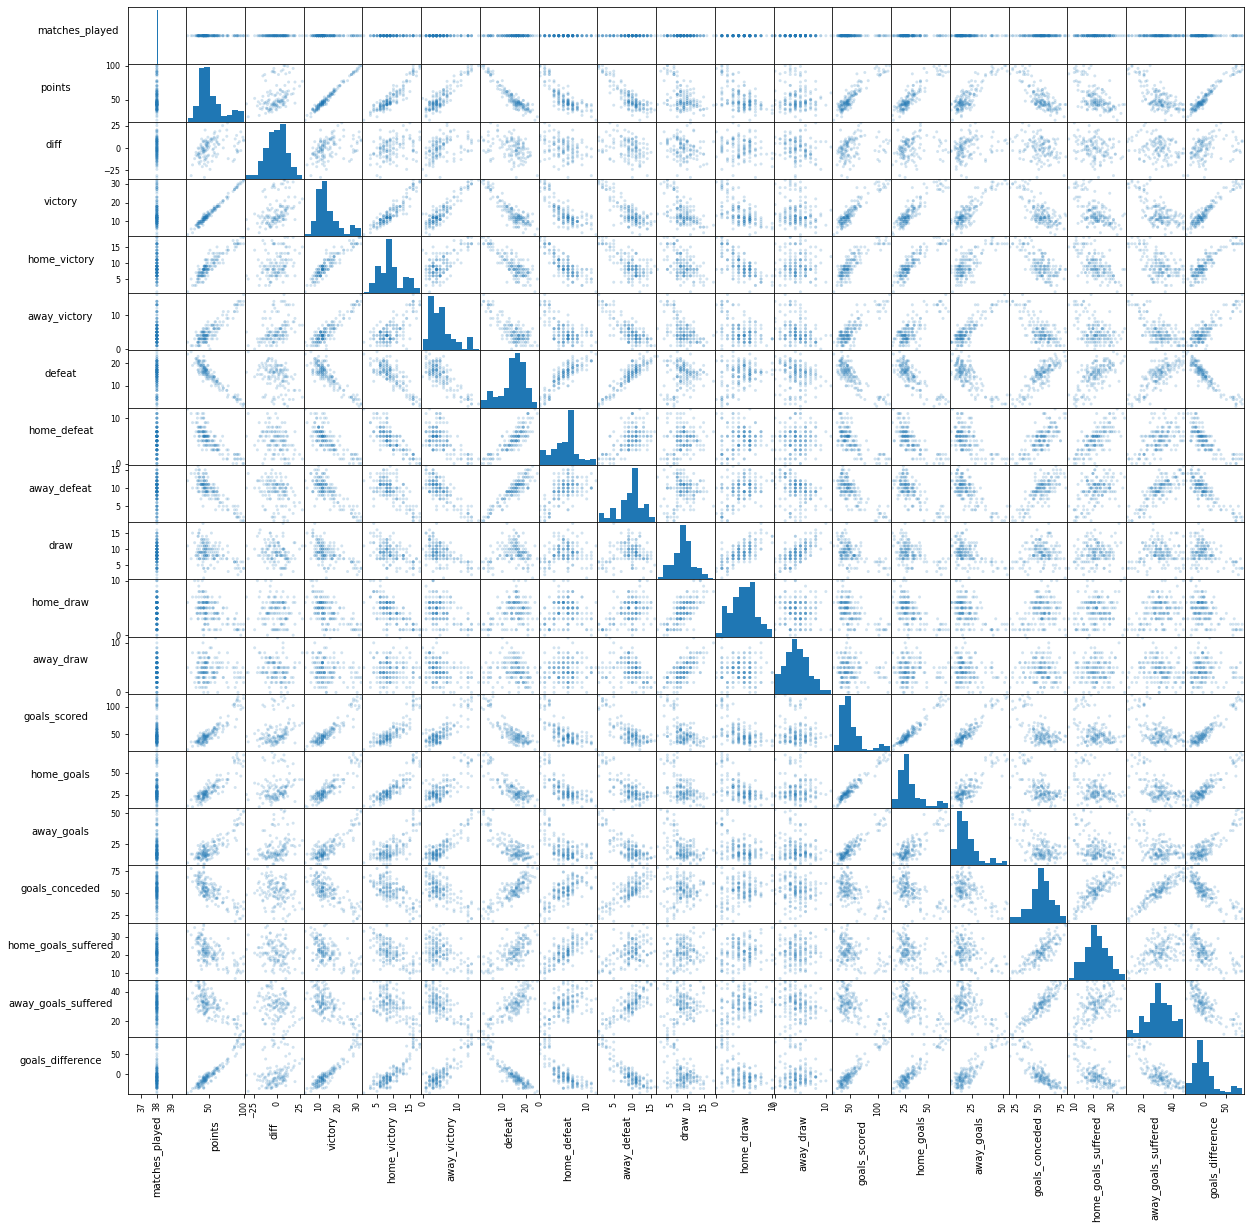

In [552]:
# plot scatter matrix
axs= pd.plotting.scatter_matrix(liga_clean, alpha= .2, figsize=[20,20])
n= len(liga_clean.columns)-1
for x in range(n):
    for y in range(n):
        # to get the axis of subplots
        ax = axs[x-1, y-1]
        # to make x axis name vertical  
        ax.xaxis.label.set_rotation(90)

        # to make y axis name horizontal 
        ax.yaxis.label.set_rotation(0)
        
        # to make sure y axis names are outside the plot area
        ax.yaxis.labelpad = 50

plt.show()

In [553]:
# correlation coefficient values
liga_clean.corr()

,matches_played,points,diff,victory,home_victory,away_victory,defeat,home_defeat,away_defeat,draw,home_draw,away_draw,goals_scored,home_goals,away_goals,goals_conceded,home_goals_suffered,away_goals_suffered,goals_difference
matches_played,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
points,NaN,1.000000,0.387999,0.990481,0.915766,0.899926,-0.942205,-0.810497,-0.855732,-0.463912,-0.540233,-0.101022,0.921929,0.898188,0.856341,-0.786633,-0.625226,-0.726111,0.965033
diff,NaN,0.387999,1.000000,0.386518,0.317678,0.397455,-0.363718,-0.341946,-0.315747,-0.219341,-0.133089,-0.171595,0.247841,0.213373,0.272101,-0.302540,-0.277906,-0.261177,0.293974
victory,NaN,0.990481,0.386518,1.000000,0.921915,0.911393,-0.887117,-0.765093,-0.804130,-0.581440,-0.605389,-0.199748,0.924742,0.898120,0.863000,-0.739613,-0.590516,-0.680780,0.947805
home_victory,NaN,0.915766,0.317678,0.921915,1.000000,0.680800,-0.826655,-0.801786,-0.678990,-0.520511,-0.690680,-0.027126,0.847525,0.876978,0.713342,-0.681729,-0.622307,-0.570948,0.870244
away_victory,NaN,0.899926,0.397455,0.911393,0.680800,1.000000,-0.799155,-0.594855,-0.799113,-0.546416,-0.410922,-0.348861,0.848123,0.766500,0.873930,-0.674217,-0.455434,-0.680663,0.867595
defeat,NaN,-0.942205,-0.363718,-0.887117,-0.826655,-0.799155,1.000000,0.855387,0.912044,0.140298,0.337908,-0.147452,-0.840439,-0.825631,-0.770800,0.837385,0.659087,0.777655,-0.928832
home_defeat,NaN,-0.810497,-0.341946,-0.765093,-0.801786,-0.594855,0.855387,1.000000,0.567726,0.133449,0.121608,0.063527,-0.699306,-0.722090,-0.590775,0.726372,0.735358,0.555922,-0.784941
away_defeat,NaN,-0.855732,-0.315747,-0.804130,-0.678990,-0.799113,0.912044,0.567726,1.000000,0.117317,0.440744,-0.284633,-0.782030,-0.740458,-0.757280,0.755748,0.465274,0.795767,-0.854712
draw,NaN,-0.463912,-0.219341,-0.581440,-0.520511,-0.546416,0.140298,0.133449,0.117317,1.000000,0.703037,0.688423,-0.502278,-0.471272,-0.492584,0.110521,0.104971,0.089602,-0.395936


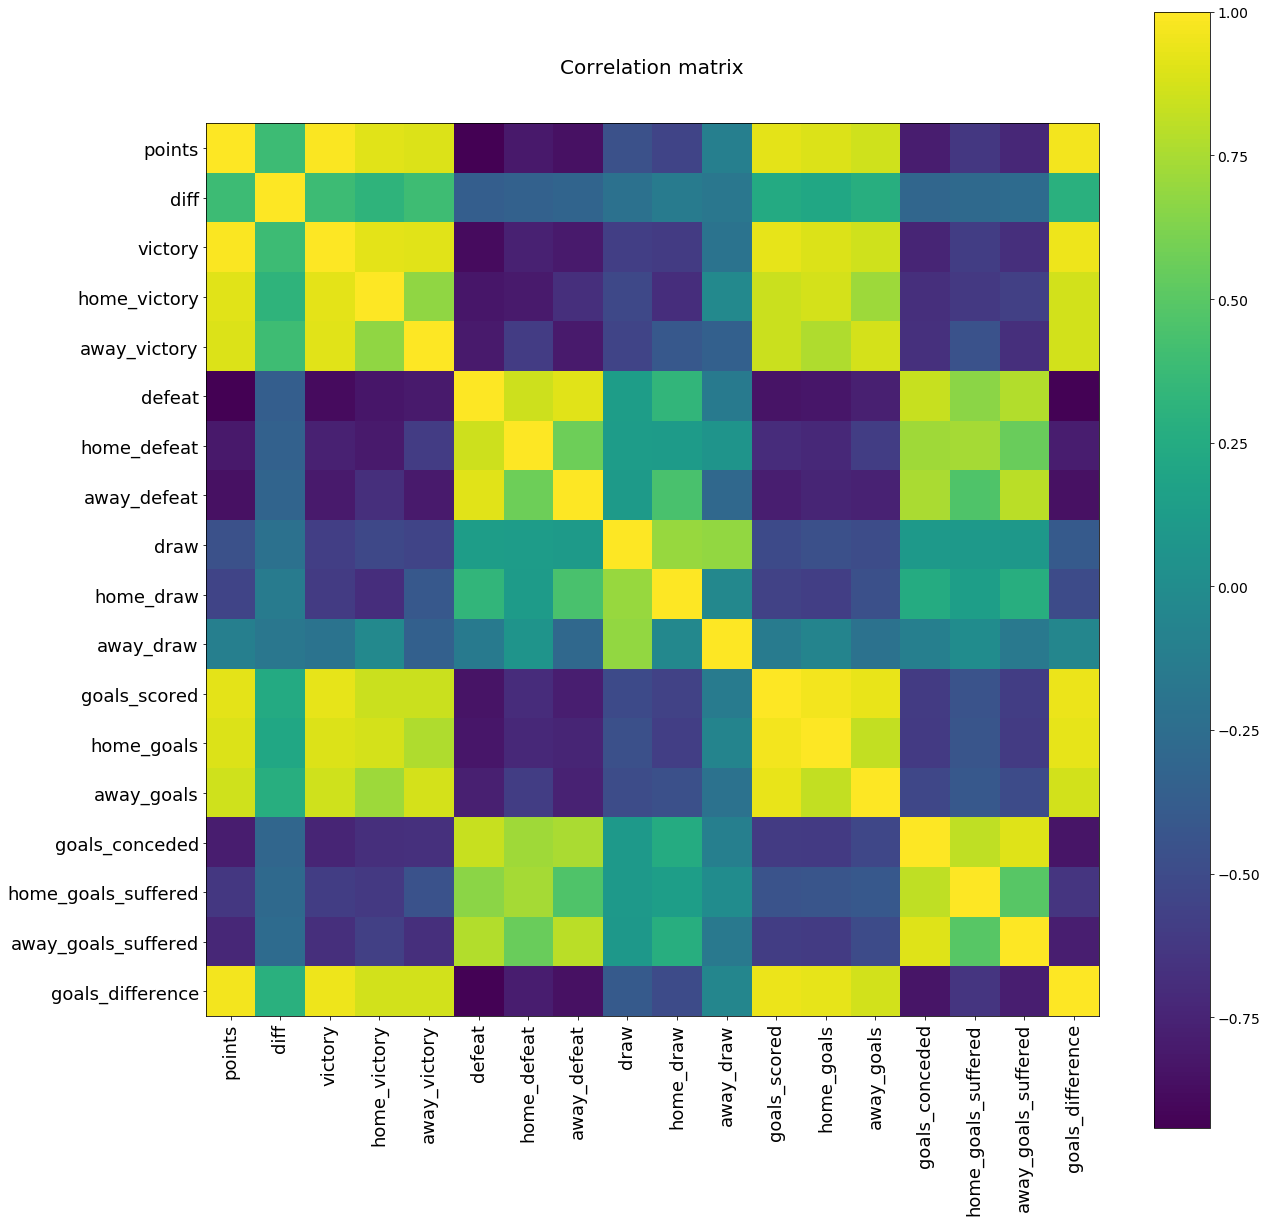

In [554]:
# plot correlation matrix heatmap
f= plt.figure(figsize=(20,20))
data= liga_clean.iloc[:,3:] # categorical columns cause an error when plotting

g= plt.matshow(data.corr(), fignum=f.number)
plt.xticks(range(liga_clean.shape[1]-3), liga_clean.columns[3:],
           rotation=90)
plt.yticks(range(liga_clean.shape[1]-3), liga_clean.columns[3:])
plt.tick_params(axis='both', which='major', labelsize=18,
                labelbottom = True, labeltop= False, top= False)

cb= plt.colorbar()
cb.ax.tick_params(labelsize=14)

plt.title("Correlation matrix", fontsize=20)

plt.show()

After taking a quick look at these 2 graphs and the specific values for the correlation coefficient of different pairs of variables, a couple of things deserve mentioning:

* As expected, the numbers of points and victories are closely, positively related $(r= 0.99)$. Interestingly, whether the victory happens at home $(r= 0.92)$ or away $(r= 0.9)$ does not seem to make much of a difference.

* Similarly, but in the other end of the spectrum, the number of points and defeats are closely, negatively related $(r= -0.94)$. Somewhat surprisingly though, being defeated at home $(r=-0.81)$ seems to affect less a teams performance overall when compared with away losses $(r= -0.86)$.

* Draws seem to have a moderate, negative relation $(r= -0.46)$ with the number of points scored by a team.

* Also expected are the relations between points-goals_scored $(corr= 0.92)$ and points-goals_conceded $(r= -0.79)$. However, it is interesting mentioning that home_goals_suffered $(r= -0.63)$ seems to have a looser relationship to points than that of away_goals_suffered $(r= -0.73)$.

* In the same token as that of victories, goals_difference and points are closely, positively related $(r= 0.97)$.

That being said, let's have a look at the distribution of the main features.

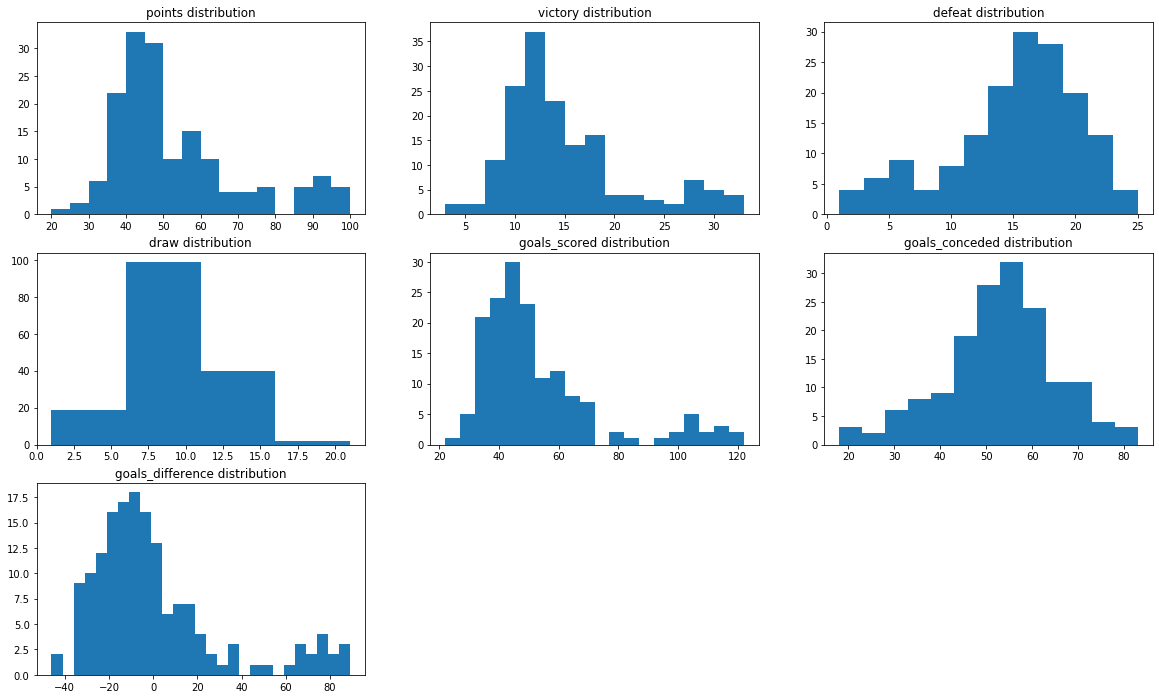

In [555]:
# plotting histograms for mains features
cols2hist= ["points", "victory", "defeat", "draw", "goals_scored",
            "goals_conceded", "goals_difference"] # columns to be plotted
bin_sizes2plot= [5, 2, 2, 5, 5, 5, 5] # bin sizes for each plot
hist_axs= np.arange(1,8,1) # ax location for each plot

plt.figure(figsize=[20,12])

"""
function for plotting histograms for cols2hist with bin sizes in 
bin_sizes2plot and axis location in hist_axs
"""
def histplot_formula():
    for col, bin_size, hist_ax in zip(cols2hist, bin_sizes2plot, hist_axs):
    #subplotting - cols2hist distributions
        plt.subplot(3,3,hist_ax)
        bin_size= bin_size
        bins_e= np.arange(liga_clean[col].min(), liga_clean[col].max() + bin_size, bin_size)
        plt.hist(data= liga_clean, x= col, bins= bins_e)
        plt.title("{} distribution".format(col))

# plotting graphs
histplot_formula()

##### Points, Victory, Goals scored and Goals difference distributions heavily skewed to the right
We can see that these histograms display a stark similarity: they are heavily skewed to the right with the bulk of the distribution within the first 2 quartiles and, most remarkably, they show evidence of some outilers within the last quartile of the distribution. 

These outliers deserve some further investigation.

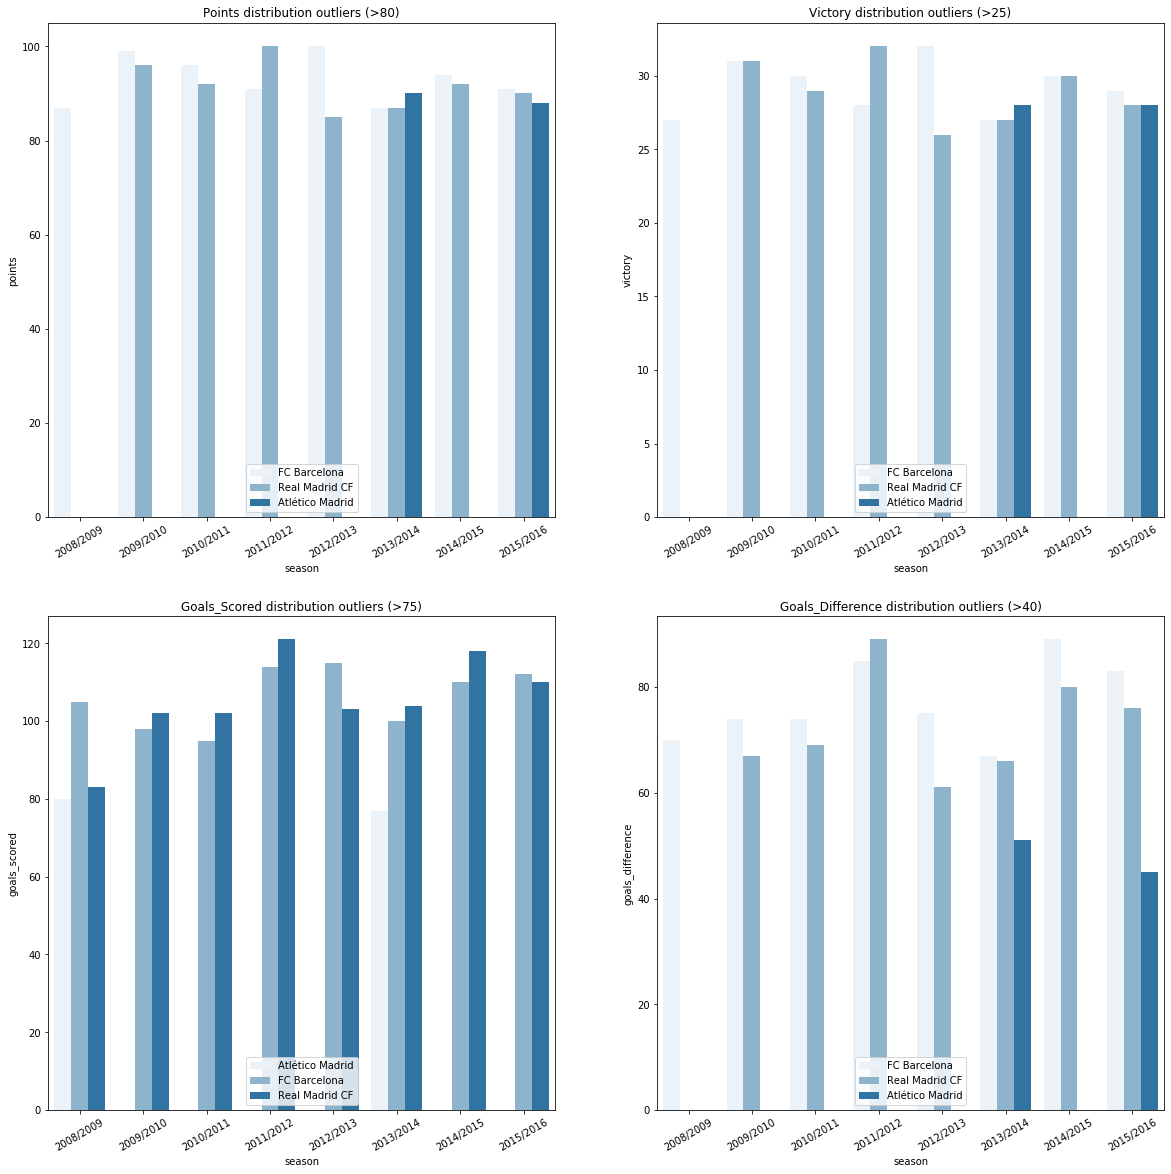

In [556]:
# barplots for outliers common features
cols2plot= ["points", "victory", "goals_scored", 
            "goals_difference"] # columns to be plotted
queries= ["points > 80", "victory > 25", "goals_scored > 75",
          "goals_difference > 40"] # queries for each subset of data
indices= np.arange(221,225,1) # ax location for each plot


fig= plt.figure(figsize=[20,20])

"""
function for plotting barplots for cols2plot limiting the dataset to 
that within queries and ax location in indicies
"""
def barplot_formula():
    for col, query, i in zip(cols2plot, queries, bar_axs):
    #subplotting - cols2hist distributions
        ax= fig.add_subplot(i)
        data2plot= liga_clean.query(query)
        base_color= sb.color_palette()[0]
        sb.barplot(ax=ax, data= data2plot, color=base_color,
        x='season', y= col, hue="team")
        plt.xticks(rotation=30)
        plt.title("{} distribution outliers (>{})".format(col.title(), query[-2:]))
        ax.legend(loc='lower center')
        
# plotting graphs
barplot_formula()

Looking at the graphs above and given that there are only 8 seasons under analysis (from 2008 through 2016), one can see that there are 3 teams which stand out in La Liga. Of those, FC Barcelona dominated (6 championships) the league during those years, closely followed by Real Madrid CF (1 championship) in most seasons. Important to mention that Atlético Madrid is the only other participant in this outlier-group, winning the championship once in the 2013/2014 season.

Next, let's take a closer look at these outilers from  a different perspective: we are going to use scatter plots to see how far apart are they from the regular teams.

In [557]:
# creating a copy of the dataset for this part of the investigation
outlier_df= liga_clean.copy()

# function to separate outliers from regular teams
outliers= ['FC Barcelona', 'Real Madrid CF', 'Atlético Madrid']
def selecter(row):
    if row in outliers:
        return row
    elif row not in outliers:
        return "reg_team"
    else:
        return np.nan

# new column distinguishing outliers from regular teams
outlier_df["outlier"]= liga_clean.team.apply(selecter)

In [558]:
# test
outlier_df.head()

,season,team,matches_played,points,diff,victory,home_victory,away_victory,defeat,home_defeat,...,home_draw,away_draw,goals_scored,home_goals,away_goals,goals_conceded,home_goals_suffered,away_goals_suffered,goals_difference,outlier
0,2008/2009,Athletic Club de Bilbao,38,44.0,NaN,12.0,9.0,3.0,18.0,8.0,...,2.0,6.0,47.0,28.0,19.0,62.0,29.0,33.0,-15.0,reg_team
1,2008/2009,Atlético Madrid,38,67.0,NaN,20.0,13.0,7.0,11.0,5.0,...,1.0,6.0,80.0,47.0,33.0,57.0,23.0,34.0,23.0,Atlético Madrid
2,2008/2009,CA Osasuna,38,43.0,NaN,10.0,8.0,2.0,15.0,6.0,...,5.0,8.0,41.0,27.0,14.0,47.0,22.0,25.0,-6.0,reg_team
3,2008/2009,CD Numancia,38,35.0,NaN,10.0,9.0,1.0,23.0,7.0,...,3.0,2.0,38.0,23.0,15.0,69.0,22.0,47.0,-31.0,reg_team
4,2008/2009,FC Barcelona,38,87.0,NaN,27.0,14.0,13.0,5.0,2.0,...,3.0,3.0,105.0,61.0,44.0,35.0,14.0,21.0,70.0,FC Barcelona


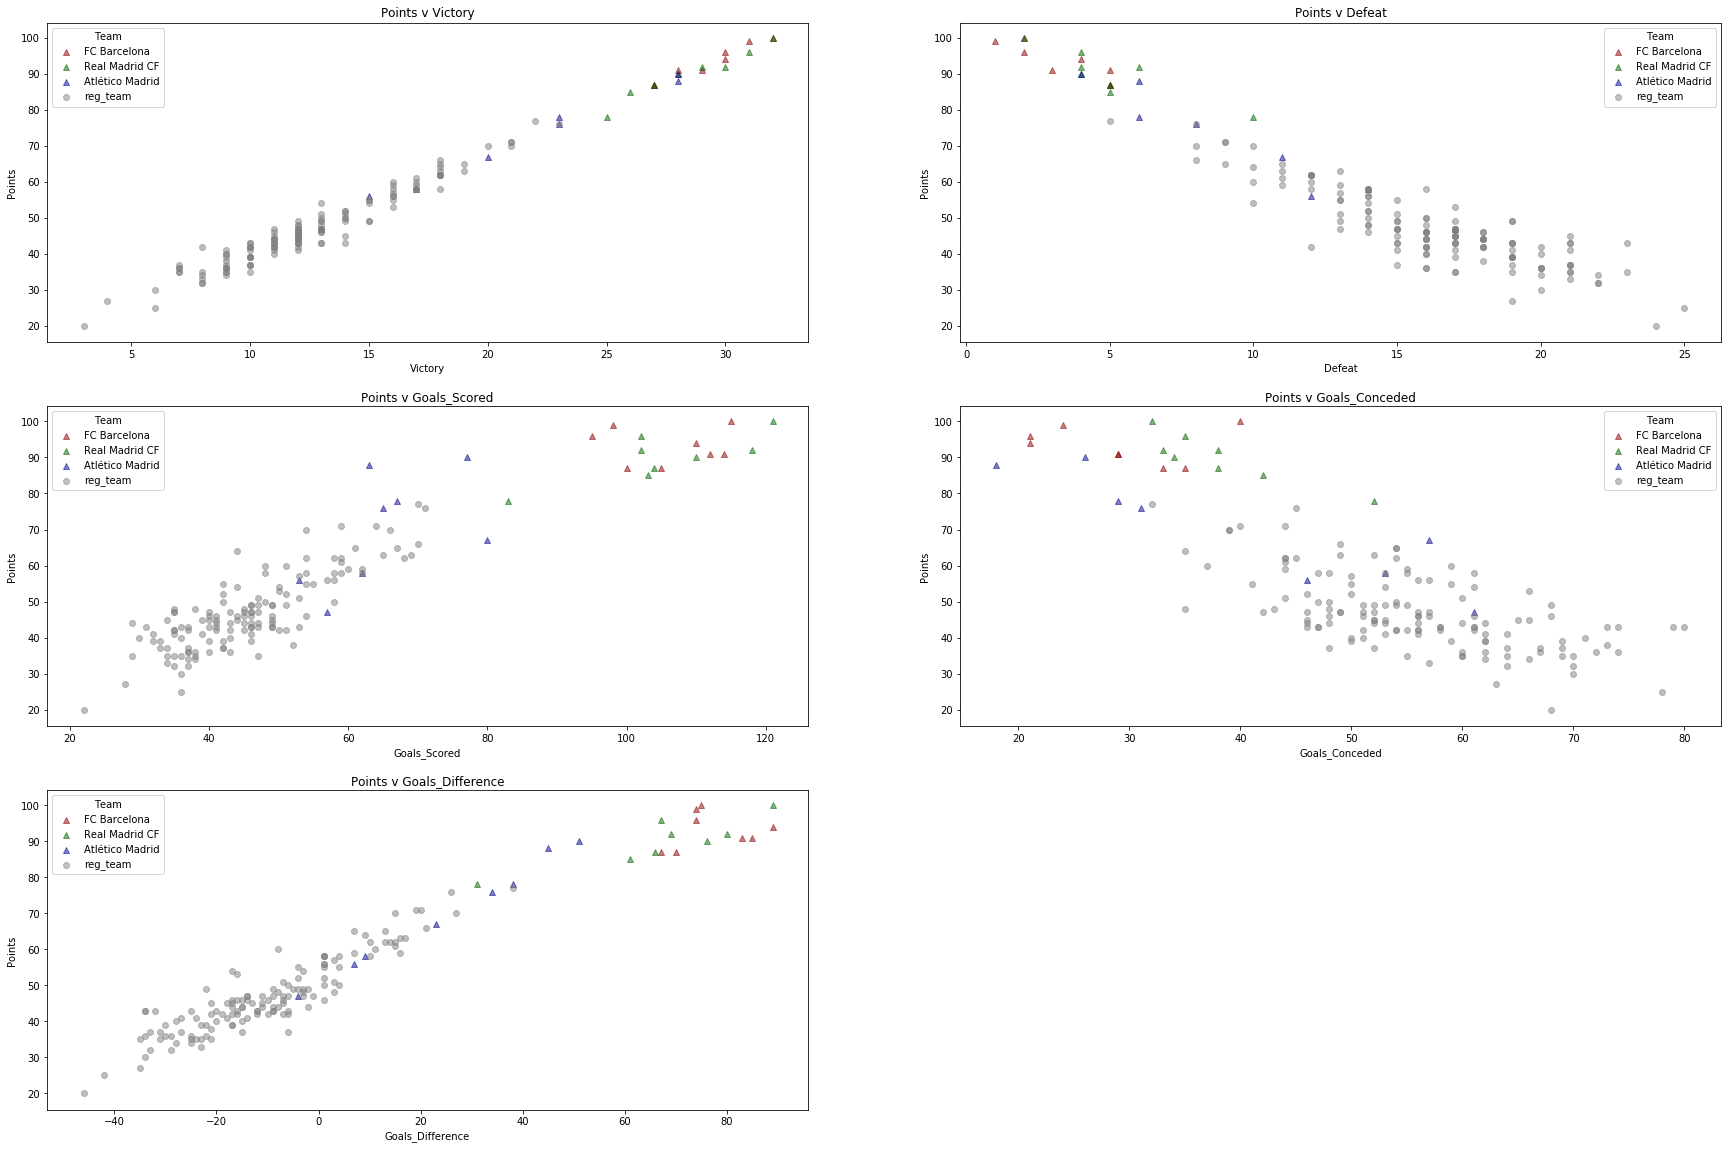

In [559]:
# outlier teams and reg_teams, markers and colors for each of them 
cols2plot= ["victory", "defeat", "goals_scored",
            "goals_conceded", "goals_difference"] # columns to plot
indices= np.arange(321,326,1) # ax location for each plot
teams= ['FC Barcelona','Real Madrid CF',
        'Atlético Madrid', "reg_team"] # teams to plot
markers= ['^', '^', '^', 'o'] # markers for each team
colors= ['darkred', 'darkgreen', 'darkblue', 'grey'] # color for each marker

fig= plt.figure(figsize=[30,20])

"""
function for plotting scatter plots for cols2plot with axis locations in
indicies, highlighting the outliers in teams
"""
def scatter2plot():
    for col, i in zip(cols2plot, indices):
        fig.add_subplot(i)
        for team, marker, color in zip(teams, markers, colors):
            plot_data = (outlier_df.loc[outlier_df['outlier'] == team])
            plt.scatter(data= plot_data, x= plot_data[col], y='points',
                        alpha= 0.5, marker= marker, color= color)
        plt.xlabel(col.title())
        plt.ylabel('Points')
        plt.legend(teams, title= 'Team')
        plt.title('Points v {}'.format(col.title()))

# plotting graphs
scatter2plot()

As suspected, the outliers (FC Barcelona, Real Madrid CF, Atlético Madrid) are quite far from the average La Liga team, thus, they might be distorting the correlation between the variables in the dataset. It is as if those 3 are on a league of their own.

With that in mind, taking a second look at the correlation matrix, only this time removing the outliers from the equation, could be interesting.

In [560]:
# correlation coefficient values without outliers
liga_clean.query("team not in @outliers").corr()

,matches_played,points,diff,victory,home_victory,away_victory,defeat,home_defeat,away_defeat,draw,home_draw,away_draw,goals_scored,home_goals,away_goals,goals_conceded,home_goals_suffered,away_goals_suffered,goals_difference
matches_played,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
points,NaN,1.000000,0.557747,0.970452,0.829572,0.712606,-0.871465,-0.724002,-0.667702,-0.154200,-0.281014,0.061279,0.825100,0.771992,0.612466,-0.626217,-0.510331,-0.496973,0.911543
diff,NaN,0.557747,1.000000,0.551567,0.387683,0.515718,-0.466378,-0.388175,-0.365900,-0.164625,-0.095024,-0.118939,0.430879,0.357092,0.389052,-0.308269,-0.259657,-0.246353,0.459999
victory,NaN,0.970452,0.551567,1.000000,0.849987,0.740482,-0.727370,-0.628353,-0.534770,-0.388051,-0.416490,-0.113749,0.825532,0.767928,0.618954,-0.518048,-0.446783,-0.391429,0.845502
home_victory,NaN,0.829572,0.387683,0.849987,1.000000,0.275347,-0.631622,-0.680178,-0.338413,-0.311886,-0.556927,0.113385,0.715155,0.796058,0.355615,-0.455013,-0.511046,-0.248817,0.736275
away_victory,NaN,0.712606,0.515718,0.740482,0.275347,1.000000,-0.521551,-0.278912,-0.544148,-0.310248,-0.049532,-0.352228,0.594115,0.385782,0.675825,-0.364877,-0.163345,-0.396873,0.603613
defeat,NaN,-0.871465,-0.466378,-0.727370,-0.631622,-0.521551,1.000000,0.781877,0.811976,-0.350212,-0.047355,-0.405488,-0.668613,-0.634658,-0.483769,0.727983,0.543255,0.617779,-0.873867
home_defeat,NaN,-0.724002,-0.388175,-0.628353,-0.680178,-0.278912,0.781877,1.000000,0.270974,-0.192421,-0.230031,-0.034735,-0.562449,-0.607423,-0.305433,0.589821,0.679128,0.309184,-0.721274
away_defeat,NaN,-0.667702,-0.365900,-0.534770,-0.338413,-0.544148,0.811976,0.270974,1.000000,-0.360577,0.142252,-0.593558,-0.505751,-0.411218,-0.460982,0.571791,0.202956,0.664383,-0.673965
draw,NaN,-0.154200,-0.164625,-0.388051,-0.311886,-0.310248,-0.350212,-0.192421,-0.360577,1.000000,0.632074,0.699835,-0.228828,-0.195805,-0.195113,-0.270598,-0.119777,-0.295417,0.019573


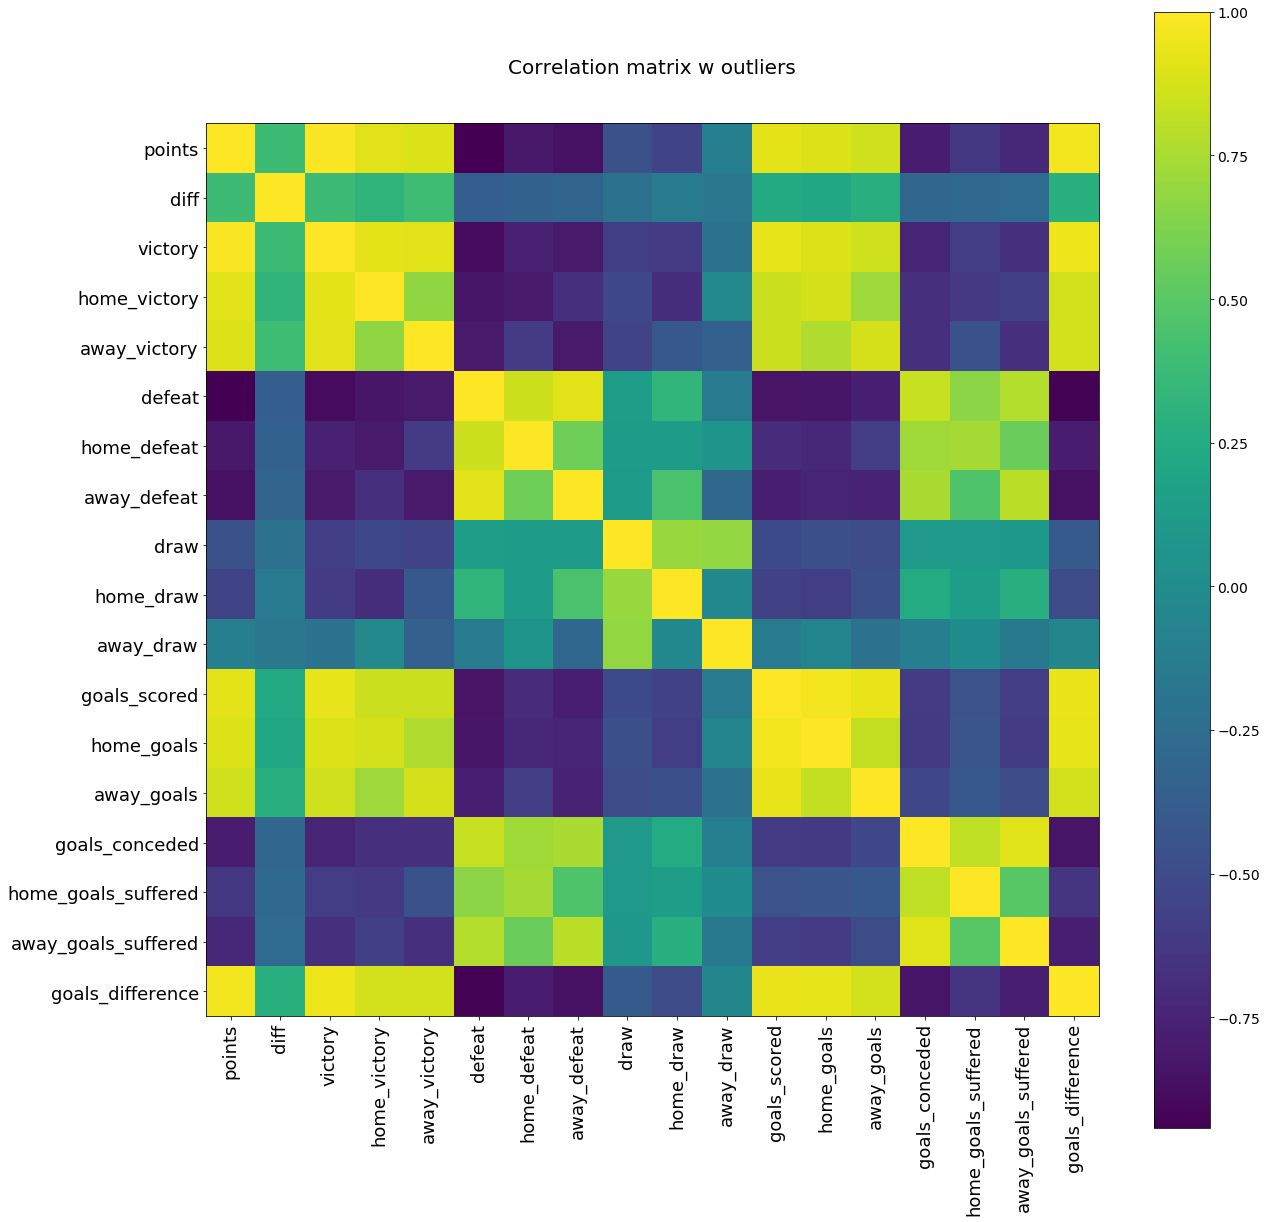

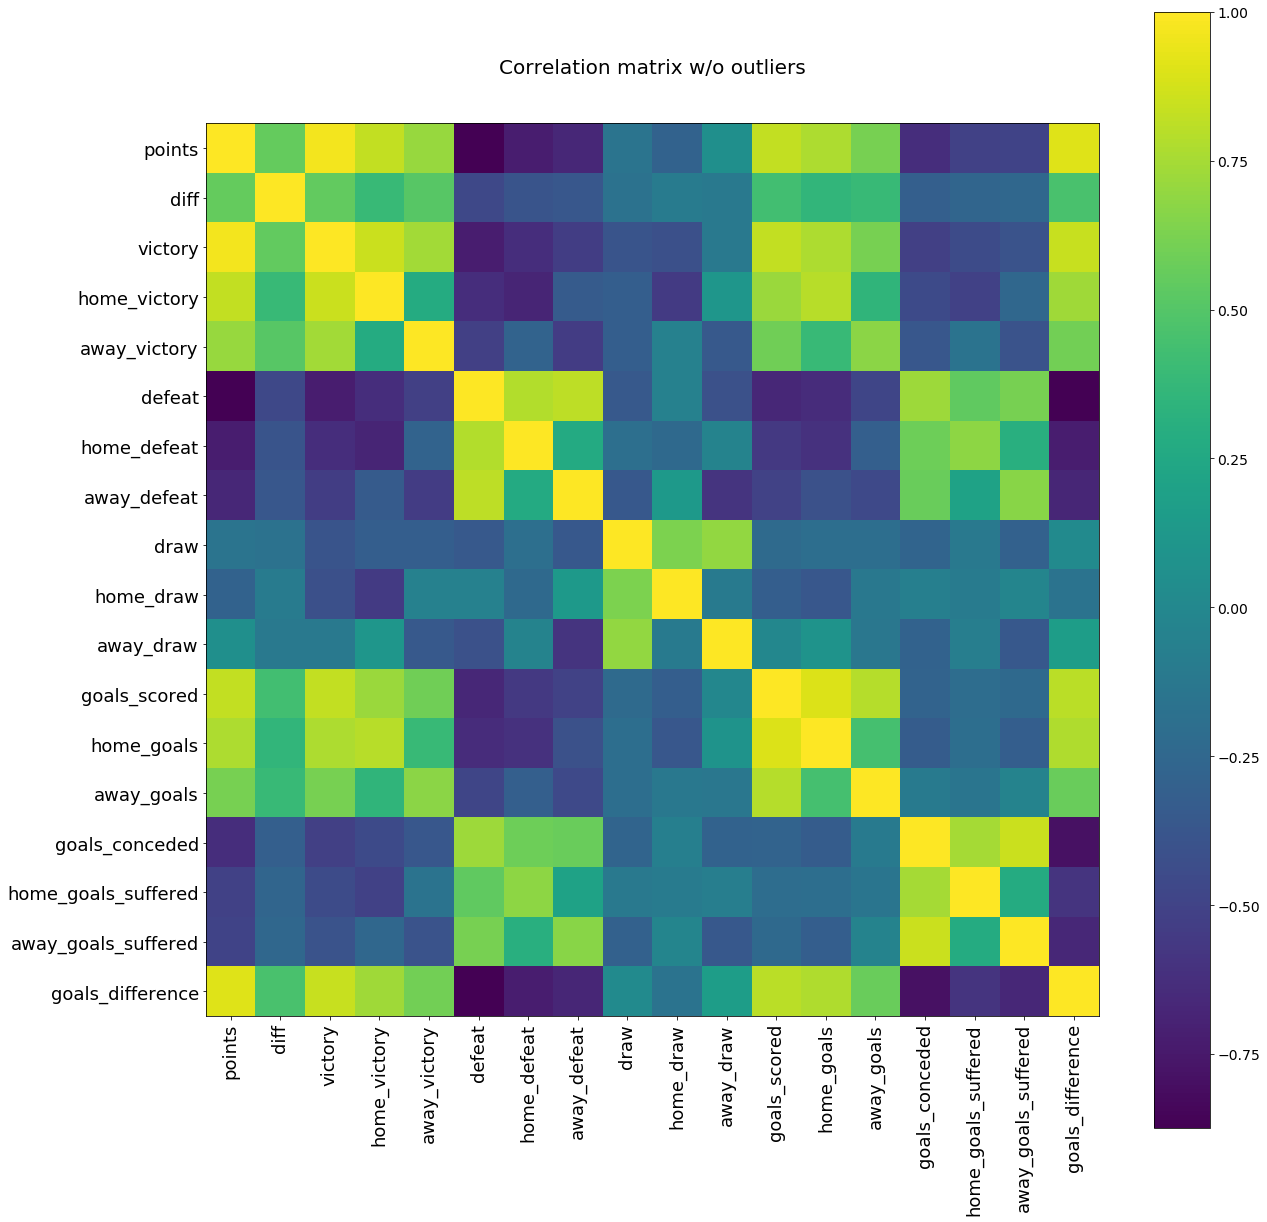

In [561]:
# plot correlation matrix heatmap
# correlation matrix
f= plt.figure(figsize=(20,20))
data= liga_clean.iloc[:,3:] # categorical columns cause an error when plotting
g= plt.matshow(data.corr(), fignum=f.number)
plt.xticks(range(liga_clean.shape[1]-3), liga_clean.columns[3:],
           rotation=90)
plt.yticks(range(liga_clean.shape[1]-3), liga_clean.columns[3:])
plt.tick_params(axis='both', which='major', labelsize=18,
                labelbottom = True, labeltop= False, top= False)
cb= plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title("Correlation matrix w outliers", fontsize=20)
plt.show()


# removing outliers
outliers= ['FC Barcelona', 'Real Madrid CF', 'Atlético Madrid']
data= liga_clean.query("team not in @outliers").iloc[:,3:] # categorical columns cause an error when plotting
# correlation matrix without outliers
f= plt.figure(figsize=(20,20))
g= plt.matshow(data.corr(), fignum=f.number)
plt.xticks(range(liga_clean.shape[1]-3), liga_clean.columns[3:],
           rotation=90)
plt.yticks(range(liga_clean.shape[1]-3), liga_clean.columns[3:])
plt.tick_params(axis='both', which='major', labelsize=18,
                labelbottom = True, labeltop= False, top= False)
cb= plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title("Correlation matrix w/o outliers", fontsize=20)
plt.show()

After revisiting these matrices, this time without the outliers, the following points are worthy of mention:

* As expected, the numbers of points and victories remain closely and positively related ($r_{w}= 0.99$ and $r_{w/o}= 0.97$). Interestingly and as it was initially expected, home victories ($r_{w}= 0.92$ and $r_{w/o}= 0.83$) seem to be more closely related to the total points scored at the end of the season than away victories ($r_{w}= 0.9$ and $r_{w/o}= 0.71$).

* Similarly, the number of points and defeats also remain closely and negatively related ($r_{w}= -0.94$ and $r_{w/o}= -0.87$). Without the ouliers, however, as one would have expected, being defeated at home ($r_{w}= -0.81$ and $r_{w/o}= -0.72$) seems to have a more noticeable effect on a team's end-of-the-season total points when compared with away losses ($r_{w}= -0.86$ and $r_{w/o}= -0.67$).

* Without the outliers, draws ($r_{w}= -0.46$ and $r_{w/o}= -0.15$) have a rather weak, negative relationship with points. Interestingly, when it comes to away draws ($r_{w}= -0.1$ and $r_{w/o}= 0.06$), the relationship seems to flip from negative to positive. In other words, it could be the case that draws, particularly away draws, more negatively affect the outliers. But, again, this seems to be a very weak correlation.

* As expected, the relationships between points and goals_scored ($r_{w}= 0.92$ and $r_{w/o}= 0.83$), and points and goals_conceded ($r_{w}= -0.79$ and $r_{w/o}= -0.63$) remain almost the same. Worthy of mention is the fact that, without the outliers, home_goals_suffered ($r_{w}= -0.63$ and $r_{w/o}= -0.51$) and away_goals_suffered ($r_{w}= -0.73$ and $r_{w/o}= -0.5$) now have a similar relationship to points. This could be indicative that the outlier's performance are more negatively affected by away_goals_suffered than regular teams.

* Finally, in the same token as that of victories, goals_difference and points remaing closely, positively related $(r= 0.97)$.

Having seen the relations above, let's try it again but from a different perspective and see if they hold up by using simple linear regression: let's take points as the response variable and, individually, victory, defeat, draw, goals_scored, and goals_conceded as the explanatory variables.

In [562]:
# Simple linear regression with OLS
cols= ["victory", "defeat", "draw", "goals_scored",
       "goals_conceded"] # columns to module

liga_clean['intercept']= 1 # create intercept

for col in cols:
    lm= sm.OLS(liga_clean['points'],
               liga_clean[["intercept", col]])
    results= lm.fit()
    print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 points   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     8180.
Date:                Tue, 29 Dec 2020   Prob (F-statistic):          5.42e-138
Time:                        19:24:14   Log-Likelihood:                -366.14
No. Observations:                 160   AIC:                             736.3
Df Residuals:                     158   BIC:                             742.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     12.7572      0.480     26.596      0.0

Using ordinary least squares (OLS) regression, the relation between each variable and the number of points a team reaches by the end of the season could be expressed by the following equations:

#### Victory as the explanatory variable
* with $\hat{y}$ as points at the end of the season;
* with $x_{v}$ as number of victories by the end of the season;

$\hat{y}= 12.76 + 2.73x_{v}$

Meaning that, if hipothetically a team had not a single victory during the season, the model would predict that team to end up with around 12.8 points. Also, with each victory, the sum would increase by 2.73 points. Important to note as well that the amount of variability in the response ($\hat{y}$) explained by the model is quite high ($R^2= 0.981$).

#### Defeat as the explanatory variable
* with $\hat{y}$ as points at the end of the season;
* with $x_{d}$ as number of defeats by the end of the season;

$\hat{y}= 98.72 - 3.16x_{d}$

That's to say, given that a team does not lose a single match by the end of the season, the model would predict that team to end up with around 98.7 points. Also, with each loss, the number of points would decrease by around 3.16 points. Important to note as well that the amount of variability in the response ($\hat{y}$) explained by the model is quite high ($R^2= 0.888$).

#### Draw as the explanatory variable
* with $\hat{y}$ as points at the end of the season;
* with $x_{dr}$ as number of draws by the end of the season;

$\hat{y}= 76.73 - 2.74x_{dr}$

Thus, given that a team never draw during the season, the model would predict that team to end up with around 84.4 points. Also, with each draw, the number of points would decrease by around 2.74 points. Important to note as well that the amount of variability in the response ($\hat{y}$) explained by the model is quite low ($R^2= 0.215$).

#### Goals scored as the explanatory variable
* with $\hat{y}$ as points at the end of the season;
* with $x_{gs}$ as number of goals scored by the end of the season;

$\hat{y}= 12.1 + 0.77x_{gs}$

Therefore, given that a team never scores a goal during the season, the model would predict that team to end up with around 12.1 points. Also, with each goal scored, the number of points would increase by around 0.77 points. Important to note as well that the amount of variability in the response ($\hat{y}$) explained by the model is quite high ($R^2= 0.85$).

#### Goals conceded as the explanatory variable
* with $\hat{y}$ as points at the end of the season;
* with $x_{gc}$ as number of goals conceded by the end of the season;

$\hat{y}= 111.74 - 1.12x_{gc}$

In other words, given that a team never suffers a goal during the season, the model would predict that team to end up with around 111.7 points. Also, with each goal suffered, the number of points would decrease by around 1.12 points. Important to note as well that the amount of variability in the response ($\hat{y}$) explained by the model is moderate ($R^2= 0.619$).

Finally, it is worthy mentioning that, given that for every variable analysed $p-value= 0$, all of them are statiscally significant for predicting the number of points.

#### 6) Which team evolved the most in terms of points scored at the end of the season?

To answer this question, we will focus on the teams which participated in both 2008/2009 and 2015/2016 season of La Liga. This is to avoid misunderstanding a team's ascending to the top league as having scored 0 points in the 2008/2009 season. Also, any variations within those years will be left out as to avoid over-complicating the analysis. 

In [563]:
# selecting relevant data
df1= liga_clean[["team", "season", "points"]]

# pivoting "season"
df1= df1.pivot(columns= "season", index= "team", values= "points").dropna()

In [564]:
# test 
df1.head()

season,2008/2009,2009/2010,2010/2011,2011/2012,2012/2013,2013/2014,2014/2015,2015/2016
team,,,,,,,,
Athletic Club de Bilbao,44.0,54.0,58.0,49.0,45.0,70.0,55.0,62.0
Atlético Madrid,67.0,47.0,58.0,56.0,76.0,90.0,78.0,88.0
FC Barcelona,87.0,99.0,96.0,91.0,100.0,87.0,94.0,91.0
Getafe CF,42.0,58.0,44.0,47.0,47.0,42.0,37.0,36.0
Málaga CF,55.0,37.0,46.0,58.0,57.0,45.0,50.0,48.0


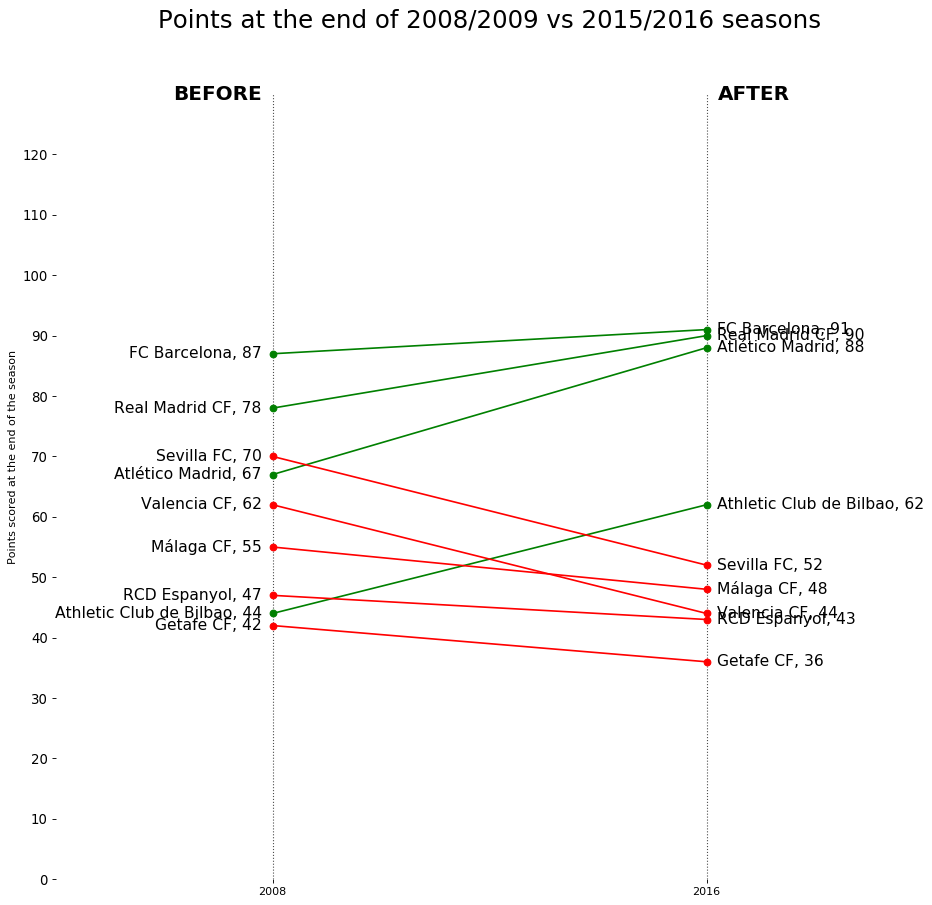

In [565]:
# setting labels
left_label = [str(c) + ', '+ str(round(y)) for c, y in zip(df1.index, df1['2008/2009'])]
right_label = [str(c) + ', '+ str(round(y)) for c, y in zip(df1.index, df1['2015/2016'])]

# define line color
klass = ['red' if (y1-y2) < 0 else 'green' for y1, y2 in zip(df1['2008/2009'], df1['2015/2016'])]

# draw line
def newline(p1, p2, color='black'):
    ax = plt.gca()
    l = mlines.Line2D([p1[0],p2[0]], [p1[1],p2[1]], color='red' if p1[1]-p2[1] > 0 else 'green', marker='o', markersize=6)
    ax.add_line(l)
    return l

fig, ax = plt.subplots(1,1,figsize=(14,14), dpi= 80)

# Vertical Lines
ax.vlines(x=1, ymin=0, ymax=130, color='black', alpha=0.7, linewidth=1, linestyles='dotted')
ax.vlines(x=3, ymin=0, ymax=130, color='black', alpha=0.7, linewidth=1, linestyles='dotted')

# Points
ax.scatter(y=df1['2008/2009'], x=np.repeat(1, df1.shape[0]), s=10, color='black', alpha=0.7)
ax.scatter(y=df1['2015/2016'], x=np.repeat(3, df1.shape[0]), s=10, color='black', alpha=0.7)

# Line Segmentsand Annotation
for p1, p2, c in zip(df1['2008/2009'], df1['2015/2016'], df1.index):
    newline([1,p1], [3,p2])
    ax.text(1-0.05, p1, c + ', ' + str(round(p1)), horizontalalignment='right', verticalalignment='center', fontdict={'size':14})
    ax.text(3+0.05, p2, c + ', ' + str(round(p2)), horizontalalignment='left', verticalalignment='center', fontdict={'size':14})

# 'Before' and 'After' Annotations
ax.text(1-0.05, 130, 'BEFORE', horizontalalignment='right', verticalalignment='center', fontdict={'size':18, 'weight':700})
ax.text(3+0.05, 130, 'AFTER', horizontalalignment='left', verticalalignment='center', fontdict={'size':18, 'weight':700})

# Decoration
ax.set_title("Points at the end of 2008/2009 vs 2015/2016 seasons", fontdict={'size':22})
ax.set(xlim=(0,4), ylim=(0,140), ylabel='Points scored at the end of the season')
ax.set_xticks([1,3])
ax.set_xticklabels(["2008", "2016"])
plt.yticks(np.arange(0, 130, 10), fontsize=12)

# Lighten borders
plt.gca().spines["top"].set_alpha(.0)
plt.gca().spines["bottom"].set_alpha(.0)
plt.gca().spines["right"].set_alpha(.0)
plt.gca().spines["left"].set_alpha(.0)
plt.show()

As we can see from the graph above, over the years, *Atlético Madrid* (21 points) and *Athletic Club de Bilbao* (18 points) are the teams that improved the most in terms of points scored at the end of the season.

[back to top](#table)
<a id='conclusions'></a>
## Conclusions
After reviewing the information available in this analysis, one could come to the following conclusions:

* 1\. Except for the Scotland Premier League and the Switzerland Super League (which have had 12 and 10 teams, respectively), the majority of leagues range from 16 to 20 teams per season;
* 2\. Spain Liga BBVA is the one with the most goals scored (8412 goals over 8 seasons), but Netherlands Eredivisie takes the lead when it comes to the average number of goals scored per match (3.1).
* 3\. Teams playing at home tend to, on average, score more goals than those playing away. And, on this matter, Real Madrid CF and FC Barcelona cap the top teams in terms of goals scored home and away, respectively.
* 4\. Specifically about Spain Liga BBVA, it seems that the number of victories, defeats and goals difference are more closely related to the number of points scored at the end of any given season, as one would expect.
* 5\. Still specifically about Spain Liga BBVA, it is important to highlight the existence of 3 teams which stand-out of the crowd (FC Barcelona, Real Madrid FC and Atlético Madrid) and that, it seems that they cause some distortion on the correlation coefficient of different pairs of variables. For instance:
    * 5.1. Home victories ($r_{w}= 0.92$ and $r_{w/o}= 0.83$) seem to be more closely related to points than away victories ($r_{w}= 0.9$ and $r_{w/o}= 0.71$).
    * 5.2. Without the ouliers, being defeated at home ($r_{w}= -0.81$ and $r_{w/o}= -0.72$) seems to affect more a team's overall performance when compared with away losses ($r_{w}= -0.86$ and $r_{w/o}= -0.67$), and draws ($r_{w}= -0.46$ and $r_{w/o}= -0.15$) have a weak, negative relationship with points.
* 6\. *Atlético Madrid* (21 points difference) is the team that improved the most over the years in terms of points scored by the end of the season.

[back to top](#table)
<a id='references'></a>
## References

[os.path - Common pathname manipulations](https://docs.python.org/3/library/os.path.html#module-os.path)

[NumPy Documentation](https://numpy.org/doc/)

[Pandas Documentation](https://pandas.pydata.org/docs/)

[Matplotlib Documentation](https://matplotlib.org/contents.html)

[Seaborn Documentation](https://seaborn.pydata.org)

[SQLite Documentation](https://docs.python.org/3/library/sqlite3.html)

[Nested lists using markdown](https://stackoverflow.com/questions/61540595/is-it-possible-to-make-a-nested-ordered-list-in-a-table-of-contents-in-jupyter-n)

[pandas.Series.map documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.map.html#pandas-series-map)

[pandas.to_datetime documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html#pandas-to-datetime)

[pandas.api.types.CategoricalDtype documentation](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.api.types.CategoricalDtype.html#pandas-api-types-categoricaldtype)

[pandas.DataFrame.agg documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.agg.html#pandas-dataframe-agg)

[Plot correlation matrix](https://stackoverflow.com/questions/29432629/plot-correlation-matrix-using-pandas)

[Making heatmap from pandas DataFrame](https://stackoverflow.com/questions/12286607/making-heatmap-from-pandas-dataframe)

[matplotlib.pyplot.matshow documentation](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.matshow.html#matplotlib-pyplot-matshow)

[Matplotlib documentation plt.tick_params](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.tick_params.html#matplotlib-pyplot-tick-params)

[Seaborn catplot documentation](https://seaborn.pydata.org/generated/seaborn.catplot.html#seaborn.catplot)

[Restriction on catplot with subplots](https://stackoverflow.com/questions/56788245/is-there-a-restriction-on-catplot-with-subplot)

[Scrap the Bar Chart to Show Changes Over Time](https://medium.com/nightingale/scrap-the-bar-chart-to-show-changes-over-time-c2d6dae621c2)

[18. Slope Chart](https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/#18.-Slope-Chart)

[How to draw a line with matplotlib?](https://stackoverflow.com/questions/36470343/how-to-draw-a-line-with-matplotlib)

[using functions to avoid code repetition](https://scottc130.medium.com/using-functions-to-avoid-code-repetition-1fe4beff6d4d)